# calculate the dissociation curve of O2 (triplet) with sto3g basis

In [1]:
import numpy as np
from pyscf import gto,scf,fci,cc,mp
mol = gto.Mole()
natoms = 2
distance = np.linspace(0.1, 3.0, 20)
n = len(distance)
energy_RHF = np.zeros(n)
energy_UHF = np.zeros(n)
energy_FCI = np.zeros(n)
energy_FCI2 = np.zeros(n)
energy_CCSD = np.zeros(n)
energy_UCCSD = np.zeros(n)
energy_MP2 = np.zeros(n)

## single point

In [110]:
mol.atom = [['O',(0.0, 0.0, 0.0)]]
mol.basis = 'sto3g' 
mol.spin = 2
mol.verbose = 0
mol.build()

molRHF = scf.ROHF(mol) 
eROHF_atom = molRHF.kernel()    
print('eROHF=',eROHF)

molFCI = fci.FCI(mol, molRHF.mo_coeff)
molFCI.nroots = 2
#molFCI = fci.addons.fix_spin_(molFCI, ss=2) # S*(S+1)
res = molFCI.kernel()
print(res[0][0])
print(res[0][1])
print(res[1][0])
eFCI_atom = res[0][0]

eROHF= -73.80415023325587
-73.80415023325588
-73.80415023325588
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
R=1.5
mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
mol.basis = 'sto3g' 
mol.spin = 2
mol.verbose = 5
mol.build()

molRHF = scf.RHF(mol) 
molRHF.kernel()    
dm0 = molRHF.make_rdm1()
dm0r1 = dm0
print('dm0:', dm0.shape)


System: uname_result(system='Linux', node='localhost.localdomain', release='3.10.0-957.el7.x86_64', version='#1 SMP Thu Nov 8 23:39:32 UTC 2018', machine='x86_64', processor='x86_64')  Threads 72
Python 3.7.0 (default, Oct  9 2018, 10:31:47) 
[GCC 7.3.0]
numpy 1.19.4  scipy 1.5.4
Date: Thu Nov 26 07:36:49 2020
PySCF version 1.7.5
PySCF path  /home/dell/.local/lib/python3.7/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 16
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 2
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT]  1 O      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr
[INPUT]  2 O      0.000000000000   0.000000000000   1.500000000000 AA    0.000000000000   0.000000000000   2.834589186848 Bohr
[INPUT] ---------------- BASIS SET ---------------- 
[INPUT] l, kappa, [nprim/nctr], expnt,        

## FCI

In [3]:
dm0=dm0r1.copy()
coeff_FCI = []
for i,R in enumerate(distance):
    mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
    mol.basis = 'sto3g'
    mol.spin = 2
    mol.build()
    
    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0=dm0,max_cycle=200)
    dm0 = molRHF.make_rdm1()
    print("R=",R)
    assert molRHF.converged == True
    
    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    molFCI.nroots = 2
    molFCI = fci.addons.fix_spin_(molFCI, ss=2) # S*(S+1)
    res = molFCI.kernel()
    energy_FCI[i] = res[0][0]
    coeff_FCI.append(res[1][0])



******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpegkpmju7
max_memory 4000 MB (current use 113 MB)
num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 3.16228e-05
E1 = -444.2063039535914  Ecoul = 107.68979599275319
init E= 2.15690702796184
cond(S) = 1961.1894573607
    CPU time for initialize scf      1.27 sec, wall time      0.02 sec
  HOMO = 0.810883961192187  LUMO = 10.6149105444479
                  Roothaan           | alpha              | beta
  Highest 2-occ =  0.536793338918905 |  0.536111100457251 |  0.537475577380546
  Lowest 0-occ =    10.6149105444479 |   10.6141106061439 |   10.6157104827585
  1-occ =          0.810883961192095 |  0.802

Overwritten attributes  contract_2e  of <class 'pyscf.fci.FCI.<locals>.CISolver'>


davidson 0 2  |r|= 0.843  e= [-269.26193822 -269.06686792]  max|de|= -269  lindep= 0.0085
davidson 1 4  |r|= 0.0298  e= [-269.27615591 -269.0838407 ]  max|de|= -0.017  lindep= 0.69
davidson 2 6  |r|= 0.00119  e= [-269.27616494 -269.08386376]  max|de|= -2.31e-05  lindep= 0.169
davidson 3 8  |r|= 3.17e-05  e= [-269.27616495 -269.08386381]  max|de|= -4.5e-08  lindep= 0.53
root 0 converged  |r|= 5.22e-07  e= -269.2761649530837  max|de|= -7.39e-12
root 1 converged  |r|= 1.49e-06  e= -269.08386380608954  max|de|= -3.44e-11
converged 4 10  |r|= 1.49e-06  e= [-269.27616495 -269.08386381]  max|de|= -3.44e-11


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpo6dhq9n6
max_memory 

                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.775597576946244 | -0.819490578185938 | -0.731704575706558
  Lowest 0-occ =    7.87076786044827 |    7.8362588522624 |    7.9052768686347
  1-occ =          0.570894448734814 |  0.147579766528392 |  0.994209130941237
  1-occ =          0.570894448734815 |  0.147579766528392 |  0.994209130941238
  Roothaan mo_energy =
[-23.34672233 -22.04515197  -2.28009621  -1.76024168  -1.76024168
  -0.94822125  -0.77559758   0.57089445   0.57089445   7.87076786]
E1 = -325.11421535247666  Ecoul = 110.1265177922527
cycle= 2 E= -131.418932822728  delta_E= -0.0913  |g|= 0.0705  |ddm|= 3.37
    CPU time for cycle= 2      1.97 sec, wall time      0.03 sec
  HOMO = 0.603752663797189  LUMO = 7.90835751498379
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.746074877191253 | -0.790917765273577 | -0.703971038447651
  Lowest 0-occ =    7.90835751498379 |   7.87200359620553 |   7.941218614611

  1-occ =          0.376549206954724 | -0.0293409543730071 |  0.782419836986014
  Roothaan mo_energy =
[-21.40359592 -21.18518626  -2.40560057  -1.37937754  -1.37937754
  -0.89348975  -0.84683052   0.37654921   0.37654921   4.48983849]
E1 = -305.51309390464087  Ecoul = 103.2337555083753
cycle= 4 E= -141.573726275632  delta_E= -1.99e-08  |g|= 1.23e-06  |ddm|= 0.00105
    CPU time for cycle= 4      0.80 sec, wall time      0.01 sec
  HOMO = 0.376549017734802  LUMO = 4.48983867788661
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.846830658397577 |  -0.90173340303381 | -0.789980758535825
  Lowest 0-occ =    4.48983867788661 |   4.43701459465439 |   4.54266278129031
  1-occ =          0.376549017734797 | -0.029331363988078 |  0.782429427370946
  1-occ =          0.376549017734802 | -0.0293313639880713 |  0.782429427370949
  Roothaan mo_energy =
[-21.40359647 -21.18518679  -2.40560082  -1.37937768  -1.37937768
  -0.89349008  -0.84683066   0.37654902   0

    CPU time for scf_cycle     11.83 sec, wall time      0.18 sec
    CPU time for SCF     11.88 sec, wall time      0.19 sec
converged SCF energy = -145.461110095399
R= 0.7105263157894737
davidson 0 2  |r|= 0.367  e= [-193.12625738 -192.41485197]  max|de|= -193  lindep= 0.00353
davidson 1 4  |r|= 0.0594  e= [-193.15413433 -192.4470117 ]  max|de|= -0.0322  lindep= 0.898
davidson 2 6  |r|= 0.0129  e= [-193.15433908 -192.44790771]  max|de|= -0.000896  lindep= 0.898
davidson 3 8  |r|= 0.0018  e= [-193.15434008 -192.44794093]  max|de|= -3.32e-05  lindep= 0.946
davidson 4 10  |r|= 0.000208  e= [-193.15434009 -192.44794132]  max|de|= -3.86e-07  lindep= 0.95
root 0 converged  |r|= 2.03e-06  e= -193.15434008770325  max|de|= -3.67e-11
davidson 5 12  |r|= 1.95e-05  e= [-193.15434009 -192.44794132]  max|de|= -4.02e-09  lindep= 0.923
root 1 converged  |r|= 2.28e-06  e= -192.447941322091  max|de|= -2.6e-11
converged 6 13  |r|= 2.28e-06  e= [-193.15434009 -192.44794132]  max|de|= -2.6e-11


********

  Highest 2-occ = -0.608407774694782 | -0.658579777456103 | -0.481311334639798
  Lowest 0-occ =    1.22495743515365 |   1.16728567230525 |   1.28262919800205
  1-occ =          0.185905136784069 | -0.365030316674469 |  0.456064315339428
  1-occ =          0.185905136784072 | -0.365030316674466 |   0.45606431533943
  Roothaan mo_energy =
[-20.38080912 -20.378146    -1.69416656  -0.89490983  -0.62274324
  -0.62274324  -0.60840777   0.18590514   0.18590514   1.22495744]
E1 = -269.34661190725427  Ecoul = 88.52184470229788
cycle= 1 E= -147.483861066163  delta_E= 0.0672  |g|= 0.0236  |ddm|= 0.365
    CPU time for cycle= 1      1.46 sec, wall time      0.02 sec
  HOMO = 0.00450864358396818  LUMO = 1.16089854669519
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.650979006183697 | -0.693458358591166 |  -0.59998352821373
  Lowest 0-occ =    1.16089854669519 |   1.11111438687444 |   1.21068270651594
  1-occ =         0.00450864358396785 | -0.352853452850075 |

E1 = -261.91035150414854  Ecoul = 85.2986630800209
cycle= 2 E= -147.626125880041  delta_E= -3.5e-05  |g|= 0.00241  |ddm|= 0.0112
    CPU time for cycle= 2      0.87 sec, wall time      0.02 sec
  HOMO = -0.0578772953925977  LUMO = 0.803841267372381
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.596042561064801 | -0.632800298606803 | -0.473052346773302
  Lowest 0-occ =   0.803841267372381 |     0.761225224838 |  0.846346824062346
  1-occ =         -0.0578772953925978 | -0.401779925122758 |  0.285947012869819
  1-occ =         -0.0578772953925977 | -0.401779925122759 |  0.285947012869818
  Roothaan mo_energy =
[-20.4346518  -20.43413609  -1.595495    -0.98328717  -0.60529882
  -0.60529882  -0.59604256  -0.0578773   -0.0578773    0.80384127]
E1 = -261.91234270571283  Ecoul = 85.30065240447135
cycle= 3 E= -147.626127757155  delta_E= -1.88e-06  |g|= 0.000265  |ddm|= 0.003
    CPU time for cycle= 3      0.67 sec, wall time      0.01 sec
  HOMO = -0.0578

  1-occ =         -0.102654580916393 | -0.434758824939235 |  0.229446987637017
  1-occ =         -0.102654580916391 | -0.434758824939234 |  0.229446987637019
  Roothaan mo_energy =
[-20.40375488 -20.40303382  -1.45497994  -1.01800573  -0.54313541
  -0.52052496  -0.52052496  -0.10265458  -0.10265458   0.56981381]
E1 = -255.8995486629414  Ecoul = 82.65115113230593
cycle= 3 E= -147.611764523515  delta_E= -2.94e-08  |g|= 5.3e-05  |ddm|= 0.000278
    CPU time for cycle= 3      2.07 sec, wall time      0.03 sec
  HOMO = -0.102644937356392  LUMO = 0.569826118172337
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.520510772443969 | -0.574935829707188 | -0.379709428355105
  Lowest 0-occ =   0.569826118172337 |  0.533023046470889 |  0.606623414683835
  1-occ =         -0.102644937356393 | -0.434750109040069 |  0.229455703536184
  1-occ =         -0.102644937356392 | -0.434750109040068 |  0.229455703536185
  Roothaan mo_energy =
[-20.4037326  -20.40301165  -1.

  HOMO = -0.134491641930835  LUMO = 0.411054096110748
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.459447049941888 | -0.518206601598368 |  -0.31101867550468
  Lowest 0-occ =   0.411054096110748 |   0.37842277660769 |  0.443699289872254
  1-occ =         -0.134491641930837 | -0.456521702061644 |   0.18754983117462
  1-occ =         -0.134491641930835 | -0.456521702061644 |   0.18754983117462
  Roothaan mo_energy =
[-20.38128119 -20.38060468  -1.35527076  -1.04672124  -0.49001788
  -0.45944705  -0.45944705  -0.13449164  -0.13449164   0.4110541 ]
E1 = -250.97308496836783  Ecoul = 80.4569445260656
cycle= 3 E= -147.534730139491  delta_E= -2.49e-07  |g|= 0.000155  |ddm|= 0.000785
    CPU time for cycle= 3      0.67 sec, wall time      0.01 sec
  HOMO = -0.134522508669454  LUMO = 0.411018329665588
                  Roothaan           | alpha              | beta
  Highest 2-occ =  -0.45948856613873 | -0.518275260786237 | -0.311058294567371
  Lowest 0-oc

  1-occ =         -0.156879178395086 | -0.470365662893862 |  0.156607306103689
  1-occ =         -0.156879178395085 |  -0.47036566289386 |   0.15660730610369
  Roothaan mo_energy =
[-20.3634121  -20.36285815  -1.28576911  -1.06897851  -0.43751245
  -0.41538048  -0.41538048  -0.15687918  -0.15687918   0.29951948]
E1 = -246.8798404649575  Ecoul = 78.6184696921406
cycle= 2 E= -147.436791857648  delta_E= -9.97e-06  |g|= 0.000965  |ddm|= 0.00405
    CPU time for cycle= 2      0.99 sec, wall time      0.02 sec
  HOMO = -0.15705125152064  LUMO = 0.299332160825809
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.415599040842506 | -0.463669486576694 |  -0.26045332385147
  Lowest 0-occ =   0.299332160825809 |  0.269542198096749 |  0.329141900446106
  1-occ =         -0.157051251520642 | -0.470528643382428 |  0.156444325615122
  1-occ =          -0.15705125152064 | -0.470528643382428 |  0.156444325615122
  Roothaan mo_energy =
[-20.3637106  -20.36315902  -1.28

  HOMO = -0.216067709046292  LUMO = 0.16441058542005
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.431351248261655 | -0.456953878848789 | -0.267307652815565
  Lowest 0-occ =    0.16441058542005 |  0.136028303940589 |  0.192792866899509
  1-occ =         -0.216067709046293 | -0.540089354808381 | 0.0839472847997872
  1-occ =         -0.216067709046292 |  -0.54008935480838 | 0.0839472847997881
  Roothaan mo_energy =
[-20.4180195  -20.41746434  -1.27857056  -1.14522225  -0.43235458
  -0.43135125  -0.43135125  -0.21606771  -0.21606771   0.16441059]
E1 = -243.44141758520175  Ecoul = 77.06462653050667
cycle= 1 E= -147.338936365976  delta_E= -0.0534  |g|= 0.00733  |ddm|= 0.112
    CPU time for cycle= 1      2.06 sec, wall time      0.03 sec
  HOMO = -0.172695253545721  LUMO = 0.219282544980291
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.383716479801254 | -0.413318956496818 |  -0.22271241085731
  Lowest 0-occ =   

davidson 33 14  |r|= 4.99e-05  e= [-166.68032551 -166.66071934]  max|de|= -3.73e-09  lindep= 0.898
davidson 34 2  |r|= 4.99e-05  e= [-166.68032551 -166.66071934]  max|de|= -2.84e-14  lindep= 0.99
davidson 35 3  |r|= 3.15e-05  e= [-166.68032551 -166.66071934]  max|de|= -1.77e-09  lindep= 0.988
davidson 36 4  |r|= 3.6e-05  e= [-166.68032552 -166.66071934]  max|de|= -2.14e-09  lindep= 0.927
davidson 37 5  |r|= 3.52e-05  e= [-166.68032552 -166.66071934]  max|de|= -1.71e-09  lindep= 0.925
davidson 38 6  |r|= 2.45e-05  e= [-166.68032552 -166.66071934]  max|de|= -1.31e-09  lindep= 0.958
davidson 39 7  |r|= 2.24e-05  e= [-166.68032552 -166.66071934]  max|de|= -1.02e-09  lindep= 0.94
davidson 40 8  |r|= 1.77e-05  e= [-166.68032552 -166.66071934]  max|de|= -6.22e-10  lindep= 0.858
davidson 41 9  |r|= 1.03e-05  e= [-166.68032552 -166.66071934]  max|de|= -3.35e-10  lindep= 0.945
root 0 converged  |r|= 5.74e-06  e= -166.6803255207225  max|de|= -7.2e-11
converged 42 10  |r|= 5.74e-06  e= [-166.68032

davidson 9 6  |r|= 0.00104  e= [-165.14816114 -165.14747149]  max|de|= -3.09e-06  lindep= 0.957
davidson 10 8  |r|= 0.000715  e= [-165.14816151 -165.14747258]  max|de|= -1.09e-06  lindep= 0.927
davidson 11 10  |r|= 0.000603  e= [-165.14816154 -165.14747331]  max|de|= -7.23e-07  lindep= 0.932
davidson 12 12  |r|= 0.000483  e= [-165.14816155 -165.14747407]  max|de|= -7.62e-07  lindep= 0.881
davidson 13 14  |r|= 0.000232  e= [-165.14816156 -165.14747418]  max|de|= -1.14e-07  lindep= 0.968
davidson 14 2  |r|= 0.000232  e= [-165.14816156 -165.14747418]  max|de|= -1.14e-13  lindep= 0.995
davidson 15 4  |r|= 0.000139  e= [-165.14816156 -165.1474742 ]  max|de|= -2.1e-08  lindep= 0.969
davidson 16 6  |r|= 5.29e-05  e= [-165.14816156 -165.14747422]  max|de|= -1.38e-08  lindep= 0.968
root 0 converged  |r|= 6.9e-06  e= -165.14816155705344  max|de|= -7.65e-11
davidson 17 8  |r|= 3.86e-05  e= [-165.14816156 -165.14747422]  max|de|= -3.17e-09  lindep= 0.918
davidson 18 9  |r|= 2.62e-05  e= [-165.1481

davidson 92 12  |r|= 0.00536  e= [-165.14839492 -165.14798367]  max|de|= -5.31e-05  lindep= 0.931
davidson 93 14  |r|= 0.00673  e= [-165.14844556 -165.14800318]  max|de|= -5.06e-05  lindep= 0.928
davidson 94 2  |r|= 0.00673  e= [-165.14844556 -165.14800318]  max|de|= 2.84e-13  lindep= 0.958
davidson 95 4  |r|= 0.00469  e= [-165.14848513 -165.14801481]  max|de|= -3.96e-05  lindep= 0.923
davidson 96 6  |r|= 0.00754  e= [-165.1485399 -165.1480274]  max|de|= -5.48e-05  lindep= 0.885
davidson 97 8  |r|= 0.0108  e= [-165.14865864 -165.14804617]  max|de|= -0.000119  lindep= 0.889
davidson 98 10  |r|= 0.0104  e= [-165.14884543 -165.14806375]  max|de|= -0.000187  lindep= 0.888
davidson 99 12  |r|= 0.0147  e= [-165.14911609 -165.1480783 ]  max|de|= -0.000271  lindep= 0.821


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09

  Roothaan mo_energy =
[-20.35089564 -20.35064669  -1.18709157  -1.13926765  -0.3547224
  -0.3547224   -0.29630127  -0.22021893  -0.22021893   0.06165927]
E1 = -235.85429722142598  Ecoul = 73.60043098202783
cycle= 1 E= -147.11317239284  delta_E= -0.0188  |g|= 0.00352  |ddm|= 0.0541
    CPU time for cycle= 1      2.09 sec, wall time      0.03 sec
  HOMO = -0.195765682346762  LUMO = 0.0862986440831807
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.277175343529313 | -0.300353324569167 |  -0.15464240044556
  Lowest 0-occ =  0.0862986440831807 |  0.061188544002754 |  0.111408744163605
  1-occ =         -0.195765700427588 | -0.486108300840476 | 0.0945779107740095
  1-occ =         -0.195765682346762 |  -0.48610827611686 | 0.0945779145158446
  Roothaan mo_energy =
[-20.31576453 -20.31419154  -1.16449576  -1.11062115  -0.3291805
  -0.32918048  -0.27717534  -0.1957657   -0.19576568   0.08629864]
E1 = -235.85490732615875  Ecoul = 73.60105471252888
cycle= 2 

davidson 23 3  |r|= 0.000341  e= [-162.75033531 -162.75003864]  max|de|= -2.51e-07  lindep= 0.985
davidson 24 4  |r|= 0.000322  e= [-162.75033531 -162.75003884]  max|de|= -1.98e-07  lindep= 0.971
davidson 25 5  |r|= 0.000358  e= [-162.75033531 -162.750039  ]  max|de|= -1.62e-07  lindep= 0.941
davidson 26 6  |r|= 0.000286  e= [-162.75033531 -162.75003917]  max|de|= -1.67e-07  lindep= 0.943
davidson 27 7  |r|= 0.000267  e= [-162.75033531 -162.75003926]  max|de|= -9.15e-08  lindep= 0.975
davidson 28 8  |r|= 0.00019  e= [-162.75033531 -162.75003932]  max|de|= -6.04e-08  lindep= 0.942
davidson 29 9  |r|= 0.000159  e= [-162.75033531 -162.75003935]  max|de|= -3.34e-08  lindep= 0.924
davidson 30 10  |r|= 0.00025  e= [-162.75033531 -162.75003943]  max|de|= -7.09e-08  lindep= 0.937
davidson 31 11  |r|= 0.000158  e= [-162.75033531 -162.75003949]  max|de|= -6.4e-08  lindep= 0.919
davidson 32 12  |r|= 5.9e-05  e= [-162.75033531 -162.75003951]  max|de|= -2.03e-08  lindep= 0.986
davidson 33 13  |r|= 

davidson 2 6  |r|= 0.391  e= [-161.47940453 -161.47940453]  max|de|= -0.103  lindep= 0.446
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 3 8  |r|= 0.132  e= [-161.7094914  -161.70949138]  max|de|= -0.23  lindep= 0.689
davidson 4 10  |r|= 0.0505  e= [-161.73707132 -161.73707126]  max|de|= -0.0276  lindep= 0.136
davidson 5 12  |r|= 0.124  e= [-161.75085312 -161.75084682]  max|de|= -0.0138  lindep= 0.826
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 6 14  |r|= 0.0725  e= [-161.76403799 -161.76403755]  max|de|= -0.0132  lindep= 0.899
davidson 7 2  |r|= 0.0725  e= [-161.76403799 -161.76403755]  max|de|= 2.84e-13  lindep= 0.931
davidson 8 4  |r|= 0.0517  e= [-161.76846625 -161.76846554]  max|de|= -0.00443  lindep= 0.926
davidson 9 6  |r|= 0.0472  e= [-161.77242007 -161.77241981]  max|de|= -0.00395  lindep= 0.924
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 10 8  |r|= 0.0356  e= [-161.77779245 -161.77779238]  max|d

E1 = -232.29731298880057  Ecoul = 71.9529963632923
cycle= 6 E= -147.021759928226  delta_E= -1.97e-08  |g|= 0.00142  |ddm|= 0.00122
    CPU time for cycle= 6      2.03 sec, wall time      0.03 sec
  HOMO = -0.2014288415959  LUMO = 0.0435377901030465
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.229580181942981 | -0.252906739452264 | -0.129191433400941
  Lowest 0-occ =  0.0435377901030465 | 0.0191615296276324 | 0.0679134819113525
  1-occ =         -0.201429212825467 | -0.484561530154407 | 0.0817007162186755
  1-occ =           -0.2014288415959 | -0.484561514437766 | 0.0817008031712611
  Roothaan mo_energy =
[-20.3006289  -20.30060956  -1.14353413  -1.11616627  -0.31028951
  -0.31028914  -0.22958018  -0.20142921  -0.20142884   0.04353779]
E1 = -232.29731930624467  Ecoul = 71.95300273316825
cycle= 7 E= -147.021759875794  delta_E= 5.24e-08  |g|= 7.13e-05  |ddm|= 0.00171
    CPU time for cycle= 7      2.17 sec, wall time      0.03 sec
  HOMO = -0.20142

                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.212686679887306 | -0.236111819565556 | -0.120035641337488
  Lowest 0-occ =   0.029236586113329 | 0.00506901675835342 |  0.053404155468306
  1-occ =         -0.203385572280097 | -0.483587157766569 | 0.0768160132083487
  1-occ =         -0.203385572248982 | -0.483587156923297 | 0.0768160124272404
  Roothaan mo_energy =
[-20.2960249  -20.29598557  -1.13735153  -1.11752156  -0.30389083
  -0.30389083  -0.21268668  -0.20338557  -0.20338557   0.02923659]
E1 = -230.81459622795958  Ecoul = 71.25664690679329
cycle= 2 E= -146.989990561816  delta_E= -1.26e-06  |g|= 0.000338  |ddm|= 0.00144
    CPU time for cycle= 2      0.74 sec, wall time      0.01 sec
  HOMO = -0.203348035382196  LUMO = 0.0292640672156679
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.212612596602784 | -0.236050351011844 | -0.120002663838526
  Lowest 0-occ =  0.0292640672156679 | 0.00509283000658403 | 0.05

Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 23 6  |r|= 1.89e-05  e= [-160.175907 -160.175907]  max|de|= -7.72e-10  lindep= 0.996
davidson 24 8  |r|= 7.35e-06  e= [-160.175907 -160.175907]  max|de|= -3.58e-10  lindep= 0.972
root 0 converged  |r|= 6.41e-06  e= -160.17590700500892  max|de|= -9.92e-11
root 1 converged  |r|= 6.41e-06  e= -160.1759070050088  max|de|= -9.92e-11
converged 25 10  |r|= 6.41e-06  e= [-160.17590701 -160.17590701]  max|de|= -9.92e-11


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpp4100b2_
max_memory 4000 MB (current use 273 MB)
num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 3.16228e-05
E1 = -2

davidson 3 8  |r|= 0.109  e= [-159.43347274 -159.43347271]  max|de|= -0.154  lindep= 0.857
davidson 4 10  |r|= 0.0533  e= [-159.45518871 -159.4551887 ]  max|de|= -0.0217  lindep= 0.0881
davidson 5 12  |r|= 0.0538  e= [-159.45521495 -159.45521495]  max|de|= -2.62e-05  lindep= 0.00199
davidson 6 14  |r|= 0.0865  e= [-159.49172139 -159.49172117]  max|de|= -0.0365  lindep= 0.971
davidson 7 2  |r|= 0.0865  e= [-159.49172139 -159.49172117]  max|de|= -9.66e-12  lindep= 0.977
davidson 8 4  |r|= 0.027  e= [-159.50087808 -159.50087801]  max|de|= -0.00916  lindep= 0.963
davidson 9 6  |r|= 0.0171  e= [-159.5016393  -159.50163906]  max|de|= -0.000761  lindep= 0.968
davidson 10 8  |r|= 0.0128  e= [-159.50188326 -159.5018832 ]  max|de|= -0.000244  lindep= 0.945
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 11 10  |r|= 0.00905  e= [-159.50233667 -159.50233665]  max|de|= -0.000453  lindep= 0.959
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 12 12  |r|

cycle= 6 E= -147.169652401236  delta_E= -7.9e-11  |g|= 9.67e-06  |ddm|= 5.02e-05
    CPU time for cycle= 6      2.02 sec, wall time      0.03 sec
  HOMO = 0.0157228679829573  LUMO = 0.122562975683146
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.296025450616893 |  -0.43559686763015 | -0.107438638215875
  Lowest 0-occ =   0.122562975683146 | -0.0635666805438793 |  0.308692632753589
  1-occ =         -0.207909553769328 | -0.483117449493633 | 0.0672983430265243
  1-occ =         0.0157228679829573 | -0.261112820781361 |  0.292558549554166
  Roothaan mo_energy =
[-2.02910149e+01 -2.02909711e+01 -1.12930560e+00 -1.12205548e+00
 -4.13409143e-01 -4.11940176e-01 -2.96025451e-01 -2.07909554e-01
  1.57228680e-02  1.22562976e-01]
E1 = -228.2638581802778  Ecoul = 69.80509194992612
Extra cycle  E= -147.169652397392  delta_E= 3.84e-09  |g|= 5.04e-05  |ddm|= 0.000136
    CPU time for scf_cycle     18.94 sec, wall time      0.29 sec
    CPU time for SCF     19.0

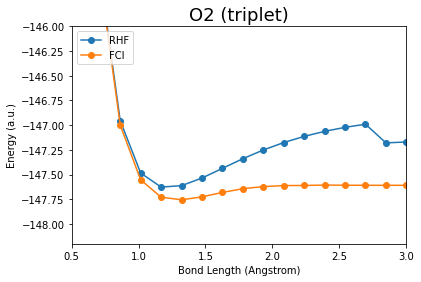

In [4]:
#plot FCI RHF
import matplotlib.pyplot as plt
plt.title("O2 (triplet)", fontsize=18)
plt.xlabel("Bond Length (Angstrom)")  
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_RHF, 'o-', label = 'RHF')
plt.plot(distance, energy_FCI, 'o-', label = 'FCI')
plt.legend(loc = 2)
plt.ylim(-148.2, -146.0)
plt.xlim(0.5, 3.0)
plt.show()

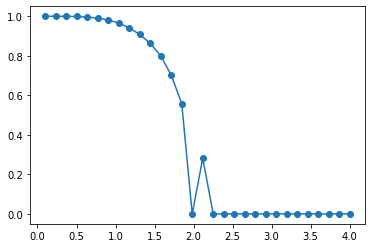

In [150]:
coeff = np.array(coeff_FCI)**2
pop = coeff.reshape(30,10*120).T.copy()
# for i in range(1200):
#     plt.plot(distance,pop[i])
plt.plot(distance,pop[0],'o-')
plt.show()

## RHF MP2 CCSD

In [4]:
dm0=dm0r1.copy()
for i,R in enumerate(distance):
    mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
    mol.basis = 'sto3g'
    mol.spin = 2
    mol.build()

    molRHF = scf.RHF(mol) 
    molRHF.conv_tol = 1e-6
    molRHF.level_shift = 0.2
    molRHF.diis_space = 12
    molRHF.diis_start_cycle = 2
    energy_RHF[i] = molRHF.kernel(dm0=dm0,max_cycle=200)
    dm0 = molRHF.make_rdm1()
    
    molMP2 = mp.MP2(molRHF)
    energy_MP2[i] = molMP2.kernel()[0] + energy_RHF[i]
    
    molCCSD = cc.CCSD(molRHF)
    molCCSD.conv_tol = 1e-6
    molCCSD.max_cycle = 200
    molCCSD.diis_space = 10
    if i==0:
        e,t1,t2 = molCCSD.kernel()
    else:
        e,t1,t2 = molCCSD.kernel(t1,t2)            
    energy_CCSD[i] = e + energy_RHF[i]
    print("R=",R)
    #assert molCCSD.converged == True



******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0.2
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 2
diis_space = 12
SCF conv_tol = 1e-06
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp0_u3rgfv
max_memory 4000 MB (current use 273 MB)
num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 0.001
E1 = -444.2063039535914  Ecoul = 107.68979599275318
init E= 2.15690702796178
cond(S) = 1961.1894573607
    CPU time for initialize scf      2.45 sec, wall time      0.04 sec
  HOMO = 1.00896808181796  LUMO = 10.8104701083261
                  Roothaan           | alpha              | beta
  Highest 2-occ =  0.699327270742505 |  0.534522075296404 |  0.535850546447487
  Lowest 0-occ =    10.8104701083261 |   10.6141006665116 |   10.6157016242138
  1-occ =           1.00896808181794 |  0.8025815

  Lowest 0-occ =    7.76788743585378 |   7.53691554589338 |     7.628939282044
  1-occ =          0.866114817346118 |  0.326746511690588 |   1.20548312300166
  1-occ =          0.866114817346125 |  0.326746511690588 |   1.20548312300166
  Roothaan mo_energy =
[-29.90340678 -22.91464587  -2.6027938   -2.29181472  -2.29181472
  -1.02655979   0.18060296   0.86611482   0.86611482   7.76788744]
E1 = -352.8683857485166  Ecoul = 117.46372522753444
cycle= 2 E= -101.346433754582  delta_E= -1.67  |g|= 0.392  |ddm|= 36.3
    CPU time for cycle= 2      1.96 sec, wall time      0.03 sec
  HOMO = 0.990546962279774  LUMO = 8.00289455466055
                  Roothaan           | alpha              | beta
  Highest 2-occ =  0.334261640077176 |  0.305254533712584 |  0.363268746441755
  Lowest 0-occ =    8.00289455466055 |     7.757492110199 |   7.84845809362409
  1-occ =           0.99054696227975 |  0.451178656624217 |   1.32991526793528
  1-occ =          0.990546962279774 |  0.451178656624241 |   1.3

  1-occ =          0.701577210410212 |  0.178262528203789 |   1.02489189261663
  1-occ =          0.701577210410213 |  0.178262528203792 |   1.02489189261664
  Roothaan mo_energy =
[-23.25554021 -21.95396928  -2.25010841  -1.73612725  -1.73612725
  -0.93602844  -0.74803275   0.70157721   0.70157721   8.10593262]
E1 = -325.1524257761636  Ecoul = 110.16444379313344
cycle= 3 E= -131.419217245534  delta_E= -0.000508  |g|= 0.00711  |ddm|= 0.166
    CPU time for cycle= 3      0.66 sec, wall time      0.01 sec
  HOMO = 0.70419758610215  LUMO = 8.10863049246621
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.745665971522163 | -0.789318645147525 |  -0.70237949194057
  Lowest 0-occ =    8.10863049246621 |   7.87381401295496 |   7.94303037603234
  1-occ =          0.704197586102132 |  0.180680221272257 |   1.02730958568511
  1-occ =           0.70419758610215 |  0.180680221272272 |   1.02730958568512
  Roothaan mo_energy =
[-23.24800215 -21.94635517  -2.24757

  1-occ =          0.476543312969427 | -0.0293690996744655 |  0.782391691684553
  1-occ =          0.476543312969431 | -0.0293690996744657 |  0.782391691684558
  Roothaan mo_energy =
[-21.40360663 -21.18519778  -2.40560116  -1.37937887  -1.37937887
  -0.89349464  -0.84683303   0.47654331   0.47654331   4.68983434]
E1 = -305.5130661755004  Ecoul = 103.23372777998911
cycle= 4 E= -141.573726274877  delta_E= -3.17e-07  |g|= 8.59e-05  |ddm|= 0.004
    CPU time for cycle= 4      0.77 sec, wall time      0.01 sec
  HOMO = 0.376547151739517  LUMO = 4.48983726998954
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.846831415250234 | -0.901734152588467 | -0.789982019662971
  Lowest 0-occ =    4.48983726998954 |    4.4370132540977 |   4.54266128588127
  1-occ =          0.376547151739513 | -0.0293332439399967 |  0.782427547419025
  1-occ =          0.376547151739517 | -0.0293332439399944 |  0.782427547419029
  Roothaan mo_energy =
[-21.40360052 -21.18519088  -2

Converting <class 'pyscf.scf.rohf.ROHF'> to UHF

******** <class 'pyscf.mp.ump2.UMP2'> ********
nocc = (9, 7), nmo = (10, 10)
max_memory 4000 MB (current use 279 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      5.61 sec, wall time      0.08 sec
E(UMP2) = -145.485261870243  E_corr = -0.0241517749112334

WARN: RCCSD method does not support ROHF method. ROHF object is converted to UHF object and UCCSD method is called.

Converting <class 'pyscf.scf.rohf.ROHF'> to UHF

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 200
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-06
diis_space = 10
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 279 MB)
E1 = -290.4945697347422  Ecoul = 97.3683123446903
Init E_corr(CCSD) = -0.00493285261750055
cycle = 1  E_corr(CCSD) = -0.0246693362974297  dE = -0.0197364837  norm(t1,t2) = 0.0663435
    CPU time for CCSD iter      7.18 sec, wall time    


******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 200
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-06
diis_space = 10
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 280 MB)
E1 = -278.7052420633762  Ecoul = 92.5148286384696
Init E_corr(CCSD) = -0.0103603696490309
cycle = 1  E_corr(CCSD) = -0.0382742020744742  dE = -0.0279138324  norm(t1,t2) = 0.100329
    CPU time for CCSD iter      2.22 sec, wall time      0.05 sec
cycle = 2  E_corr(CCSD) = -0.0431356024469739  dE = -0.00486140037  norm(t1,t2) = 0.0250956
    CPU time for CCSD iter      2.32 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.0446083612316648  dE = -0.00147275878  norm(t1,t2) = 0.00877227
    CPU time for CCSD iter      5.12 sec, wall time      0.09 sec
cycle = 4  E_corr(CCSD) = -0.0445730457149377  dE = 3.53155167e-05  norm(t1,t2) = 0.00214867
    CPU time for CCSD iter      9.33 sec, wall time      0.15 sec
cycle = 5 

E1 = -269.3638070321091  Ecoul = 88.53887824071002
Init E_corr(CCSD) = 0.0108946734242081
cycle = 1  E_corr(CCSD) = -0.053046324902522  dE = -0.0639409983  norm(t1,t2) = 0.186334
    CPU time for CCSD iter      8.90 sec, wall time      0.15 sec
cycle = 2  E_corr(CCSD) = -0.0644415309542927  dE = -0.0113952061  norm(t1,t2) = 0.050826
    CPU time for CCSD iter      2.29 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.0683579177799066  dE = -0.00391638683  norm(t1,t2) = 0.0193008
    CPU time for CCSD iter      3.20 sec, wall time      0.06 sec
cycle = 4  E_corr(CCSD) = -0.0683242838725614  dE = 3.36339073e-05  norm(t1,t2) = 0.00335972
    CPU time for CCSD iter      1.51 sec, wall time      0.04 sec
cycle = 5  E_corr(CCSD) = -0.0683623058911635  dE = -3.80220186e-05  norm(t1,t2) = 0.00058604
    CPU time for CCSD iter      2.13 sec, wall time      0.05 sec
cycle = 6  E_corr(CCSD) = -0.0683546392956137  dE = 7.66659555e-06  norm(t1,t2) = 5.35998e-05
    CPU time for CCSD iter  

    CPU time for CCSD iter      8.79 sec, wall time      0.14 sec
cycle = 2  E_corr(CCSD) = -0.0952856046844374  dE = -0.0138793874  norm(t1,t2) = 0.0692332
    CPU time for CCSD iter      9.10 sec, wall time      0.15 sec
cycle = 3  E_corr(CCSD) = -0.100126017393747  dE = -0.00484041271  norm(t1,t2) = 0.0300663
    CPU time for CCSD iter      5.32 sec, wall time      0.09 sec
cycle = 4  E_corr(CCSD) = -0.100285658576848  dE = -0.000159641183  norm(t1,t2) = 0.00705782
    CPU time for CCSD iter      9.39 sec, wall time      0.15 sec
cycle = 5  E_corr(CCSD) = -0.100429781071782  dE = -0.000144122495  norm(t1,t2) = 0.00179972
    CPU time for CCSD iter      3.36 sec, wall time      0.06 sec
cycle = 6  E_corr(CCSD) = -0.1004053309597  dE = 2.44501121e-05  norm(t1,t2) = 0.000184799
    CPU time for CCSD iter      9.12 sec, wall time      0.14 sec
cycle = 7  E_corr(CCSD) = -0.100416452898392  dE = -1.11219387e-05  norm(t1,t2) = 3.78265e-05
    CPU time for CCSD iter      6.40 sec, wall time

cycle = 6  E_corr(CCSD) = -0.138655220281747  dE = -4.82792338e-06  norm(t1,t2) = 0.00097377
    CPU time for CCSD iter      6.10 sec, wall time      0.10 sec
cycle = 7  E_corr(CCSD) = -0.13866244229838  dE = -7.22201663e-06  norm(t1,t2) = 0.000324629
    CPU time for CCSD iter      9.46 sec, wall time      0.15 sec
cycle = 8  E_corr(CCSD) = -0.13866299452476  dE = -5.5222638e-07  norm(t1,t2) = 8.47839e-05
    CPU time for CCSD iter      8.12 sec, wall time      0.13 sec
cycle = 9  E_corr(CCSD) = -0.138661798456984  dE = 1.19606778e-06  norm(t1,t2) = 3.03626e-05
    CPU time for CCSD iter      9.16 sec, wall time      0.14 sec
cycle = 10  E_corr(CCSD) = -0.138661865857367  dE = -6.74003821e-08  norm(t1,t2) = 1.10711e-05
    CPU time for CCSD iter      9.18 sec, wall time      0.15 sec
cycle = 11  E_corr(CCSD) = -0.138661774990806  dE = 9.08665607e-08  norm(t1,t2) = 2.67992e-06
    CPU time for CCSD iter      7.77 sec, wall time      0.12 sec
cycle = 12  E_corr(CCSD) = -0.13866180590028

cycle = 9  E_corr(CCSD) = -0.179754532791575  dE = 5.22159276e-05  norm(t1,t2) = 9.92334e-05
    CPU time for CCSD iter      8.60 sec, wall time      0.14 sec
cycle = 10  E_corr(CCSD) = -0.179774621303622  dE = -2.0088512e-05  norm(t1,t2) = 4.80723e-05
    CPU time for CCSD iter      6.74 sec, wall time      0.11 sec
cycle = 11  E_corr(CCSD) = -0.179772723949241  dE = 1.89735438e-06  norm(t1,t2) = 8.1291e-06
    CPU time for CCSD iter      9.20 sec, wall time      0.15 sec
cycle = 12  E_corr(CCSD) = -0.179772242471921  dE = 4.8147732e-07  norm(t1,t2) = 1.63722e-06
    CPU time for CCSD iter      9.48 sec, wall time      0.15 sec
cycle = 13  E_corr(CCSD) = -0.179772547540776  dE = -3.05068855e-07  norm(t1,t2) = 6.32949e-07
    CPU time for CCSD iter      6.73 sec, wall time      0.11 sec
    CPU time for CCSD    101.56 sec, wall time      1.65 sec
UCCSD converged
E(UCCSD) = -147.7145026969043  E_corr = -0.1797725475407762
R= 1.473684210526316


******** <class 'pyscf.scf.rohf.ROHF'> ***

    CPU time for CCSD    117.97 sec, wall time      1.90 sec
UCCSD converged
E(UCCSD) = -147.658732379869  E_corr = -0.2219400864967405
R= 1.6263157894736844


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0.2
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 2
diis_space = 12
SCF conv_tol = 1e-06
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp1h2x1evb
max_memory 4000 MB (current use 284 MB)
num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 0.001
E1 = -242.51201244534732  Ecoul = 76.1886402521272
init E= -147.285517504501
cond(S) = 1.9149606954717207
    CPU time for initialize scf      6.42 sec, wall time      0.09 sec
  HOMO = -0.117963578980985  LUMO = 0.364315696160904
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.427624327208581 | -0.4

num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 0.001
E1 = -239.74362817740615  Ecoul = 74.99884664607029
init E= -147.211280482869
cond(S) = 1.7716569296555718
    CPU time for initialize scf      6.62 sec, wall time      0.09 sec
  HOMO = -0.123325989081666  LUMO = 0.316852096613597
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.375464939160703 | -0.404056210040567 | -0.233417622897073
  Lowest 0-occ =   0.316852096613597 | 0.0899303562693863 |  0.143866299763255
  1-occ =         -0.123325989081667 | -0.533424609416556 | 0.0741115589112333
  1-occ =         -0.123325989081666 | -0.533424609416555 |  0.074111558911235
  Roothaan mo_energy =
[-20.3947926  -20.39441354  -1.23498541  -1.15091615  -0.39927787
  -0.39927787  -0.37546494  -0.12332599  -0.12332599   0.3168521 ]
E1 = -240.51601363711802  Ecoul = 75.73161160434262
cycle= 1 E= -147.250900984309  delta_E= -0.0396  |g|= 0.00607  |ddm|= 0.0883
    CPU time for cycle= 

    CPU time for CCSD iter      9.15 sec, wall time      0.14 sec
cycle = 25  E_corr(CCSD) = -0.328180343092177  dE = 1.72048667e-06  norm(t1,t2) = 1.24877e-05
    CPU time for CCSD iter      9.50 sec, wall time      0.15 sec
cycle = 26  E_corr(CCSD) = -0.328178522114375  dE = 1.8209778e-06  norm(t1,t2) = 9.85039e-06
    CPU time for CCSD iter      7.90 sec, wall time      0.12 sec
cycle = 27  E_corr(CCSD) = -0.328178189163344  dE = 3.32951031e-07  norm(t1,t2) = 7.42333e-06
    CPU time for CCSD iter      8.23 sec, wall time      0.13 sec
cycle = 28  E_corr(CCSD) = -0.328178610956171  dE = -4.21792827e-07  norm(t1,t2) = 6.02662e-06
    CPU time for CCSD iter      8.03 sec, wall time      0.13 sec
cycle = 29  E_corr(CCSD) = -0.328179159692717  dE = -5.48736545e-07  norm(t1,t2) = 3.62691e-06
    CPU time for CCSD iter      9.58 sec, wall time      0.15 sec
cycle = 30  E_corr(CCSD) = -0.328179574960017  dE = -4.152673e-07  norm(t1,t2) = 2.43801e-06
    CPU time for CCSD iter      8.49 sec

    CPU time for CCSD iter      9.68 sec, wall time      0.15 sec
cycle = 12  E_corr(CCSD) = -0.313258627081483  dE = 0.00778600043  norm(t1,t2) = 0.0673739
    CPU time for CCSD iter      9.52 sec, wall time      0.15 sec
cycle = 13  E_corr(CCSD) = -0.309917435238152  dE = 0.00334119184  norm(t1,t2) = 0.047207
    CPU time for CCSD iter      9.18 sec, wall time      0.14 sec
cycle = 14  E_corr(CCSD) = -0.309529411017995  dE = 0.00038802422  norm(t1,t2) = 0.0509817
    CPU time for CCSD iter      9.19 sec, wall time      0.15 sec
cycle = 15  E_corr(CCSD) = -0.307529239019865  dE = 0.002000172  norm(t1,t2) = 0.0542571
    CPU time for CCSD iter      8.48 sec, wall time      0.13 sec
cycle = 16  E_corr(CCSD) = -0.318198062818997  dE = -0.0106688238  norm(t1,t2) = 0.0570995
    CPU time for CCSD iter      7.17 sec, wall time      0.11 sec
cycle = 17  E_corr(CCSD) = -0.319038455579164  dE = -0.00084039276  norm(t1,t2) = 0.0629622
    CPU time for CCSD iter      9.20 sec, wall time      0.1

    CPU time for CCSD iter      8.27 sec, wall time      0.13 sec
cycle = 65  E_corr(CCSD) = -0.356880063174046  dE = 0.00492924737  norm(t1,t2) = 0.686338
    CPU time for CCSD iter      8.43 sec, wall time      0.13 sec
cycle = 66  E_corr(CCSD) = -0.342634375177053  dE = 0.014245688  norm(t1,t2) = 0.631503
    CPU time for CCSD iter      9.39 sec, wall time      0.15 sec
cycle = 67  E_corr(CCSD) = -0.32042953262985  dE = 0.0222048425  norm(t1,t2) = 0.440306
    CPU time for CCSD iter      7.20 sec, wall time      0.12 sec
cycle = 68  E_corr(CCSD) = -0.322876636496981  dE = -0.00244710387  norm(t1,t2) = 0.219922
    CPU time for CCSD iter      6.70 sec, wall time      0.11 sec
cycle = 69  E_corr(CCSD) = -0.326302932732303  dE = -0.00342629624  norm(t1,t2) = 0.236012
    CPU time for CCSD iter      8.96 sec, wall time      0.14 sec
cycle = 70  E_corr(CCSD) = -0.339637022959075  dE = -0.0133340902  norm(t1,t2) = 0.264921
    CPU time for CCSD iter      6.99 sec, wall time      0.11 sec


    CPU time for CCSD iter      9.60 sec, wall time      0.15 sec
cycle = 118  E_corr(CCSD) = -0.287359517658432  dE = -0.0245572386  norm(t1,t2) = 0.182217
    CPU time for CCSD iter      8.81 sec, wall time      0.14 sec
cycle = 119  E_corr(CCSD) = -0.29225656405711  dE = -0.0048970464  norm(t1,t2) = 0.108279
    CPU time for CCSD iter      9.51 sec, wall time      0.15 sec
cycle = 120  E_corr(CCSD) = -0.296936051577914  dE = -0.00467948752  norm(t1,t2) = 0.109268
    CPU time for CCSD iter      6.92 sec, wall time      0.11 sec
cycle = 121  E_corr(CCSD) = -0.30011142268285  dE = -0.0031753711  norm(t1,t2) = 0.115145
    CPU time for CCSD iter      8.20 sec, wall time      0.13 sec
cycle = 122  E_corr(CCSD) = -0.303138486521106  dE = -0.00302706384  norm(t1,t2) = 0.121857
    CPU time for CCSD iter      9.95 sec, wall time      0.16 sec
cycle = 123  E_corr(CCSD) = -0.302328295556635  dE = 0.000810190964  norm(t1,t2) = 0.13026
    CPU time for CCSD iter      6.99 sec, wall time      0

cycle = 170  E_corr(CCSD) = -0.288159366741966  dE = 0.00933854764  norm(t1,t2) = 0.116253
    CPU time for CCSD iter      7.64 sec, wall time      0.12 sec
cycle = 171  E_corr(CCSD) = -0.286637272320548  dE = 0.00152209442  norm(t1,t2) = 0.10812
    CPU time for CCSD iter      9.59 sec, wall time      0.15 sec
cycle = 172  E_corr(CCSD) = -0.284093301057055  dE = 0.00254397126  norm(t1,t2) = 0.108604
    CPU time for CCSD iter      9.34 sec, wall time      0.15 sec
cycle = 173  E_corr(CCSD) = -0.2839770331646  dE = 0.000116267892  norm(t1,t2) = 0.110537
    CPU time for CCSD iter      7.34 sec, wall time      0.12 sec
cycle = 174  E_corr(CCSD) = -0.279712338669359  dE = 0.0042646945  norm(t1,t2) = 0.110658
    CPU time for CCSD iter      9.05 sec, wall time      0.14 sec
cycle = 175  E_corr(CCSD) = -0.278849269075626  dE = 0.000863069594  norm(t1,t2) = 0.117194
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
cycle = 176  E_corr(CCSD) = -0.274258216889197  dE = 0.00459

  Lowest 0-occ =  0.0863179540545432 |  0.061208687377598 |  0.111427220731489
  1-occ =         -0.195742014613422 | -0.486086159525886 | 0.0946021597547594
  1-occ =          -0.19574200840964 | -0.486086151323424 | 0.0946021610863704
  Roothaan mo_energy =
[-20.31508098 -20.31480427  -1.16446121  -1.11061721  -0.32915366
  -0.32915365  -0.27712302  -0.19574201  -0.19574201   0.08631795]
E1 = -235.8550134159888  Ecoul = 73.60114639195375
Extra cycle  E= -147.113173177477  delta_E= 3.3e-07  |g|= 0.00113  |ddm|= 0.000997
    CPU time for scf_cycle     10.08 sec, wall time      0.16 sec
    CPU time for SCF     10.13 sec, wall time      0.17 sec
converged SCF energy = -147.113173177477

WARN: RMP2 method does not support ROHF method. ROHF object is converted to UHF object and UMP2 method is called.

Converting <class 'pyscf.scf.rohf.ROHF'> to UHF

******** <class 'pyscf.mp.ump2.UMP2'> ********
nocc = (9, 7), nmo = (10, 10)
max_memory 4000 MB (current use 284 MB)
transform (ia|jb) incore

cycle = 43  E_corr(CCSD) = -0.298268601592338  dE = 0.0405389264  norm(t1,t2) = 0.0622636
    CPU time for CCSD iter      6.87 sec, wall time      0.11 sec
cycle = 44  E_corr(CCSD) = -0.324583952865253  dE = -0.0263153513  norm(t1,t2) = 0.152088
    CPU time for CCSD iter      9.50 sec, wall time      0.15 sec
cycle = 45  E_corr(CCSD) = -0.317332515602078  dE = 0.00725143726  norm(t1,t2) = 0.0667088
    CPU time for CCSD iter      9.77 sec, wall time      0.15 sec
cycle = 46  E_corr(CCSD) = -0.325403686859704  dE = -0.00807117126  norm(t1,t2) = 0.0803017
    CPU time for CCSD iter      8.60 sec, wall time      0.14 sec
cycle = 47  E_corr(CCSD) = -0.328311157173607  dE = -0.00290747031  norm(t1,t2) = 0.0656098
    CPU time for CCSD iter      9.09 sec, wall time      0.15 sec
cycle = 48  E_corr(CCSD) = -0.322311650221353  dE = 0.00599950695  norm(t1,t2) = 0.0626834
    CPU time for CCSD iter      9.66 sec, wall time      0.15 sec
cycle = 49  E_corr(CCSD) = -0.327101990864526  dE = -0.004

    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 96  E_corr(CCSD) = -0.332219862398204  dE = 0.0327234463  norm(t1,t2) = 0.128916
    CPU time for CCSD iter      4.81 sec, wall time      0.08 sec
cycle = 97  E_corr(CCSD) = -0.336143130125418  dE = -0.00392326773  norm(t1,t2) = 0.0605434
    CPU time for CCSD iter      9.64 sec, wall time      0.15 sec
cycle = 98  E_corr(CCSD) = -0.334244311964236  dE = 0.00189881816  norm(t1,t2) = 0.0606325
    CPU time for CCSD iter      7.88 sec, wall time      0.13 sec
cycle = 99  E_corr(CCSD) = -0.337011064406152  dE = -0.00276675244  norm(t1,t2) = 0.0603017
    CPU time for CCSD iter      9.50 sec, wall time      0.15 sec
cycle = 100  E_corr(CCSD) = -0.333965688846162  dE = 0.00304537556  norm(t1,t2) = 0.060938
    CPU time for CCSD iter      6.91 sec, wall time      0.11 sec
cycle = 101  E_corr(CCSD) = -0.333171529028899  dE = 0.000794159817  norm(t1,t2) = 0.0603067
    CPU time for CCSD iter      9.12 sec, wall time     

    CPU time for CCSD iter      6.88 sec, wall time      0.11 sec
cycle = 148  E_corr(CCSD) = -0.329681377030551  dE = 0.003302778  norm(t1,t2) = 0.0603438
    CPU time for CCSD iter      7.93 sec, wall time      0.12 sec
cycle = 149  E_corr(CCSD) = -0.331498059358772  dE = -0.00181668233  norm(t1,t2) = 0.0616289
    CPU time for CCSD iter      7.20 sec, wall time      0.12 sec
cycle = 150  E_corr(CCSD) = -0.33122305311987  dE = 0.000275006239  norm(t1,t2) = 0.0607413
    CPU time for CCSD iter      8.21 sec, wall time      0.13 sec
cycle = 151  E_corr(CCSD) = -0.333355425556366  dE = -0.00213237244  norm(t1,t2) = 0.0608411
    CPU time for CCSD iter      7.17 sec, wall time      0.12 sec
cycle = 152  E_corr(CCSD) = -0.331988588164614  dE = 0.00136683739  norm(t1,t2) = 0.0603201
    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 153  E_corr(CCSD) = -0.330304688752258  dE = 0.00168389941  norm(t1,t2) = 0.0605707
    CPU time for CCSD iter      9.41 sec, wall time 

    CPU time for CCSD iter      9.12 sec, wall time      0.14 sec
cycle = 200  E_corr(CCSD) = -0.330280737650804  dE = -0.0044744676  norm(t1,t2) = 0.0652236
    CPU time for CCSD iter      9.12 sec, wall time      0.14 sec
    CPU time for CCSD   1639.78 sec, wall time     26.15 sec
UCCSD not converged
E(UCCSD) = -147.4434539151277  E_corr = -0.3302807376508035
R= 2.236842105263158


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0.2
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 2
diis_space = 12
SCF conv_tol = 1e-06
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpwgr6s_le
max_memory 4000 MB (current use 284 MB)
num. doubly occ = 7  num. singly occ = 2
Set gradient conv threshold to 0.001
E1 = -233.63297082035916  Ecoul = 72.40918371763306
init E= -147.050230087776
cond(S) = 1.6433250210268113
    

                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.250879839240657 | -0.274108520442458 | -0.140531732731278
  Lowest 0-occ =   0.262090936015315 | 0.0374125280932625 | 0.0867675570151236
  1-occ =         -0.0990198732511338 | -0.485510323226551 | 0.0874514510570924
  1-occ =         -0.0990181821072592 | -0.485510598623758 | 0.0874514233441337
  Roothaan mo_energy =
[-20.30689867 -20.30688129  -1.15227706  -1.1140226   -0.31855392
  -0.31855223  -0.25087984  -0.09901987  -0.09901818   0.26209094]
E1 = -233.96462671620026  Ecoul = 72.7287590744597
cycle= 10 E= -147.062310626791  delta_E= -1.63e-07  |g|= 0.000532  |ddm|= 0.000574
    CPU time for cycle= 10      2.01 sec, wall time      0.03 sec
  HOMO = -0.199029058562833  LUMO = 0.0620902754076255
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.250879287096515 | -0.274108639125678 | -0.140531767814937
  Lowest 0-occ =  0.0620902754076255 | 0.0374127792331418 | 0.

cycle = 37  E_corr(CCSD) = -0.372928109090668  dE = -0.00565165651  norm(t1,t2) = 0.0221285
    CPU time for CCSD iter      4.30 sec, wall time      0.08 sec
cycle = 38  E_corr(CCSD) = -0.372400807636309  dE = 0.000527301454  norm(t1,t2) = 0.0221304
    CPU time for CCSD iter      9.14 sec, wall time      0.15 sec
cycle = 39  E_corr(CCSD) = -0.371035368163321  dE = 0.00136543947  norm(t1,t2) = 0.0219726
    CPU time for CCSD iter      9.15 sec, wall time      0.14 sec
cycle = 40  E_corr(CCSD) = -0.372145996597255  dE = -0.00111062843  norm(t1,t2) = 0.0217108
    CPU time for CCSD iter      8.51 sec, wall time      0.13 sec
cycle = 41  E_corr(CCSD) = -0.363888925796333  dE = 0.0082570708  norm(t1,t2) = 0.0219173
    CPU time for CCSD iter      9.46 sec, wall time      0.15 sec
cycle = 42  E_corr(CCSD) = -0.374417249357437  dE = -0.0105283236  norm(t1,t2) = 0.0239297
    CPU time for CCSD iter      7.96 sec, wall time      0.13 sec
cycle = 43  E_corr(CCSD) = -0.373977168968909  dE = 0.00

    CPU time for CCSD iter      6.89 sec, wall time      0.11 sec
cycle = 90  E_corr(CCSD) = -0.359402430110951  dE = 0.0174147127  norm(t1,t2) = 0.0242967
    CPU time for CCSD iter      7.85 sec, wall time      0.12 sec
cycle = 91  E_corr(CCSD) = -0.366499039372796  dE = -0.00709660926  norm(t1,t2) = 0.0283226
    CPU time for CCSD iter      9.41 sec, wall time      0.14 sec
cycle = 92  E_corr(CCSD) = -0.384541159728792  dE = -0.0180421204  norm(t1,t2) = 0.0224131
    CPU time for CCSD iter      9.81 sec, wall time      0.15 sec
cycle = 93  E_corr(CCSD) = -0.379210831261951  dE = 0.00533032847  norm(t1,t2) = 0.033839
    CPU time for CCSD iter      6.51 sec, wall time      0.11 sec
cycle = 94  E_corr(CCSD) = -0.380884887080511  dE = -0.00167405582  norm(t1,t2) = 0.0265093
    CPU time for CCSD iter      8.90 sec, wall time      0.14 sec
cycle = 95  E_corr(CCSD) = -0.38140863175714  dE = -0.000523744677  norm(t1,t2) = 0.0284546
    CPU time for CCSD iter      9.55 sec, wall time      

    CPU time for CCSD iter      9.89 sec, wall time      0.16 sec
cycle = 142  E_corr(CCSD) = -0.378809540575453  dE = 0.0018901007  norm(t1,t2) = 0.0282135
    CPU time for CCSD iter      6.67 sec, wall time      0.11 sec
cycle = 143  E_corr(CCSD) = -0.378603523447002  dE = 0.000206017128  norm(t1,t2) = 0.0260816
    CPU time for CCSD iter      9.49 sec, wall time      0.15 sec
cycle = 144  E_corr(CCSD) = -0.381912937630092  dE = -0.00330941418  norm(t1,t2) = 0.0258746
    CPU time for CCSD iter      9.46 sec, wall time      0.15 sec
cycle = 145  E_corr(CCSD) = -0.3785170668125  dE = 0.00339587082  norm(t1,t2) = 0.0298009
    CPU time for CCSD iter      8.97 sec, wall time      0.14 sec
cycle = 146  E_corr(CCSD) = -0.356295025861311  dE = 0.022222041  norm(t1,t2) = 0.0257894
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
cycle = 147  E_corr(CCSD) = -0.395794107508244  dE = -0.0394990816  norm(t1,t2) = 0.0327515
    CPU time for CCSD iter      9.17 sec, wall time    

    CPU time for CCSD iter      7.90 sec, wall time      0.13 sec
cycle = 194  E_corr(CCSD) = -0.37903784986079  dE = -0.00185612863  norm(t1,t2) = 0.0245785
    CPU time for CCSD iter      9.54 sec, wall time      0.15 sec
cycle = 195  E_corr(CCSD) = -0.342662928224906  dE = 0.0363749216  norm(t1,t2) = 0.0263155
    CPU time for CCSD iter      9.58 sec, wall time      0.15 sec
cycle = 196  E_corr(CCSD) = -0.375652391203128  dE = -0.032989463  norm(t1,t2) = 0.0655353
    CPU time for CCSD iter      7.70 sec, wall time      0.12 sec
cycle = 197  E_corr(CCSD) = -0.375331429161777  dE = 0.000320962041  norm(t1,t2) = 0.0234489
    CPU time for CCSD iter      7.89 sec, wall time      0.12 sec
cycle = 198  E_corr(CCSD) = -0.375575125365008  dE = -0.000243696203  norm(t1,t2) = 0.0232459
    CPU time for CCSD iter      7.26 sec, wall time      0.12 sec
cycle = 199  E_corr(CCSD) = -0.373986878925589  dE = 0.00158824644  norm(t1,t2) = 0.0233983
    CPU time for CCSD iter      8.83 sec, wall time

    CPU time for cycle= 8      2.00 sec, wall time      0.03 sec
  HOMO = -0.100931236376518  LUMO = 0.243544868624606
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.229586266474161 | -0.252904377867159 |  -0.12918649166753
  Lowest 0-occ =   0.243544868624606 | 0.0191600273827532 | 0.0679120752189326
  1-occ =         -0.101409507705725 | -0.484559944001442 | 0.0817024462386041
  1-occ =         -0.100931236376518 | -0.484592494790378 | 0.0816963953363852
  Roothaan mo_energy =
[-20.30064258 -20.30059724  -1.1435354   -1.11616528  -0.31078687
  -0.31030881  -0.22958627  -0.10140951  -0.10093124   0.24354487]
E1 = -232.2973204415441  Ecoul = 71.95300521580936
cycle= 9 E= -147.021758528453  delta_E= -5.13e-06  |g|= 0.00456  |ddm|= 0.00335
    CPU time for cycle= 9      2.00 sec, wall time      0.03 sec
  HOMO = -0.1013240079187  LUMO = 0.243540442692539
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.2295824746

    CPU time for CCSD iter      9.74 sec, wall time      0.16 sec
cycle = 22  E_corr(CCSD) = -0.379285196457853  dE = -0.00217564912  norm(t1,t2) = 0.0159116
    CPU time for CCSD iter      9.23 sec, wall time      0.15 sec
cycle = 23  E_corr(CCSD) = -0.379265336781967  dE = 1.98596759e-05  norm(t1,t2) = 0.0110725
    CPU time for CCSD iter      9.48 sec, wall time      0.15 sec
cycle = 24  E_corr(CCSD) = -0.378380615497947  dE = 0.000884721284  norm(t1,t2) = 0.0115501
    CPU time for CCSD iter      7.51 sec, wall time      0.12 sec
cycle = 25  E_corr(CCSD) = -0.380628923867396  dE = -0.00224830837  norm(t1,t2) = 0.013288
    CPU time for CCSD iter      9.47 sec, wall time      0.15 sec
cycle = 26  E_corr(CCSD) = -0.379674809421364  dE = 0.000954114446  norm(t1,t2) = 0.0102003
    CPU time for CCSD iter      7.97 sec, wall time      0.13 sec
cycle = 27  E_corr(CCSD) = -0.383294958965242  dE = -0.00362014954  norm(t1,t2) = 0.0112703
    CPU time for CCSD iter      9.45 sec, wall time  

cycle = 73  E_corr(CCSD) = -0.384632473098666  dE = -4.96845222e-06  norm(t1,t2) = 0.000209155
    CPU time for CCSD iter      6.91 sec, wall time      0.11 sec
cycle = 74  E_corr(CCSD) = -0.38463588742372  dE = -3.41432505e-06  norm(t1,t2) = 0.00019483
    CPU time for CCSD iter      9.59 sec, wall time      0.15 sec
cycle = 75  E_corr(CCSD) = -0.384631290295908  dE = 4.59712781e-06  norm(t1,t2) = 0.000193518
    CPU time for CCSD iter      9.46 sec, wall time      0.15 sec
cycle = 76  E_corr(CCSD) = -0.38462405667796  dE = 7.23361795e-06  norm(t1,t2) = 0.000196767
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
cycle = 77  E_corr(CCSD) = -0.384651840458619  dE = -2.77837807e-05  norm(t1,t2) = 0.000201199
    CPU time for CCSD iter      9.58 sec, wall time      0.15 sec
cycle = 78  E_corr(CCSD) = -0.384626053375096  dE = 2.57870835e-05  norm(t1,t2) = 0.000211981
    CPU time for CCSD iter      9.63 sec, wall time      0.15 sec
cycle = 79  E_corr(CCSD) = -0.3846009650

    CPU time for CCSD iter      9.61 sec, wall time      0.15 sec
cycle = 125  E_corr(CCSD) = -0.384566546266744  dE = 5.1094608e-06  norm(t1,t2) = 0.000113878
    CPU time for CCSD iter      7.52 sec, wall time      0.12 sec
cycle = 126  E_corr(CCSD) = -0.384570766323671  dE = -4.22005693e-06  norm(t1,t2) = 0.000114966
    CPU time for CCSD iter      9.56 sec, wall time      0.15 sec
cycle = 127  E_corr(CCSD) = -0.384570865187324  dE = -9.8863653e-08  norm(t1,t2) = 0.000117626
    CPU time for CCSD iter      9.51 sec, wall time      0.15 sec
cycle = 128  E_corr(CCSD) = -0.384578644576561  dE = -7.77938924e-06  norm(t1,t2) = 0.000118749
    CPU time for CCSD iter      9.43 sec, wall time      0.15 sec
cycle = 129  E_corr(CCSD) = -0.384586525711987  dE = -7.88113543e-06  norm(t1,t2) = 0.000101573
    CPU time for CCSD iter      6.79 sec, wall time      0.11 sec
cycle = 130  E_corr(CCSD) = -0.384590556615296  dE = -4.03090331e-06  norm(t1,t2) = 8.5694e-05
    CPU time for CCSD iter      

cycle = 175  E_corr(CCSD) = -0.384587717541622  dE = 1.65863328e-07  norm(t1,t2) = 7.92487e-05
    CPU time for CCSD iter      8.94 sec, wall time      0.14 sec
cycle = 176  E_corr(CCSD) = -0.384590599476191  dE = -2.88193457e-06  norm(t1,t2) = 7.94469e-05
    CPU time for CCSD iter      4.43 sec, wall time      0.08 sec
cycle = 177  E_corr(CCSD) = -0.384591479801354  dE = -8.80325163e-07  norm(t1,t2) = 7.84391e-05
    CPU time for CCSD iter      9.46 sec, wall time      0.15 sec
Linear dependence found in DIIS error vectors.
cycle = 178  E_corr(CCSD) = -0.384591477477035  dE = 2.3243189e-09  norm(t1,t2) = 7.99856e-05
    CPU time for CCSD iter      7.25 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 179  E_corr(CCSD) = -0.384598116830199  dE = -6.63935316e-06  norm(t1,t2) = 8.33093e-05
    CPU time for CCSD iter      9.12 sec, wall time      0.15 sec
cycle = 180  E_corr(CCSD) = -0.384599854413792  dE = -1.73758359e-06  norm(t1,t2) = 8.21775e-05
   

    CPU time for cycle= 4      1.97 sec, wall time      0.03 sec
  HOMO = -0.109483855144212  LUMO = 0.228334904932103
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.211694003254101 | -0.232646519089403 | -0.112944991720409
  Lowest 0-occ =   0.228334904932103 | 0.00174172500161533 | 0.0502879733870012
  1-occ =         -0.110250329283021 | -0.503240649823309 | 0.0698327937176791
  1-occ =         -0.109483855144212 | -0.479897225779403 | 0.0806398226018282
  Roothaan mo_energy =
[-20.3003196  -20.29151779  -1.13756647  -1.11720334  -0.29768387
  -0.29692151  -0.211694    -0.11025033  -0.10948386   0.2283349 ]
E1 = -230.81477900425642  Ecoul = 71.25768640813169
cycle= 5 E= -146.989133836775  delta_E= -0.0116  |g|= 0.09  |ddm|= 0.181
    CPU time for cycle= 5      2.03 sec, wall time      0.03 sec
  HOMO = -0.101209362225265  LUMO = 0.228942623930921
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.2123019475507

  1-occ =          -0.10598155850123 | -0.483686768505667 | 0.0768439000407009
  1-occ =         -0.102759763329888 | -0.483528223259656 | 0.0768759162714076
  Roothaan mo_energy =
[-20.29628688 -20.29562634  -1.13729428  -1.11750889  -0.30441093
  -0.30121065  -0.2126382   -0.10598156  -0.10275976   0.22927564]
E1 = -230.81474700156588  Ecoul = 71.2567887388269
cycle= 15 E= -146.989999503389  delta_E= 0.000139  |g|= 0.00655  |ddm|= 0.0241
    CPU time for cycle= 15      2.04 sec, wall time      0.03 sec
  HOMO = -0.10341394124394  LUMO = 0.229251486543022
                  Roothaan           | alpha              | beta
  Highest 2-occ =   -0.2125856549158 | -0.236035743513476 | -0.119979281311797
  Lowest 0-occ =   0.229251486543022 | 0.00509836172423904 | 0.0534362752538791
  1-occ =         -0.105411723641314 | -0.483532338458775 | 0.0768409743352853
  1-occ =          -0.10341394124394 | -0.483542723456118 | 0.0768606488892518
  Roothaan mo_energy =
[-20.29608241 -20.29583022  -1.1

    CPU time for CCSD iter      9.30 sec, wall time      0.15 sec
cycle = 19  E_corr(CCSD) = 0.0335127818657414  dE = -0.0117048365  norm(t1,t2) = 0.721229
    CPU time for CCSD iter      9.21 sec, wall time      0.15 sec
cycle = 20  E_corr(CCSD) = 0.0561864003650947  dE = 0.0226736185  norm(t1,t2) = 1.19984
    CPU time for CCSD iter      9.13 sec, wall time      0.15 sec
cycle = 21  E_corr(CCSD) = 0.0792768624826543  dE = 0.0230904621  norm(t1,t2) = 0.702316
    CPU time for CCSD iter      9.69 sec, wall time      0.15 sec
cycle = 22  E_corr(CCSD) = 0.0674217249431739  dE = -0.0118551375  norm(t1,t2) = 0.555347
    CPU time for CCSD iter      8.84 sec, wall time      0.14 sec
cycle = 23  E_corr(CCSD) = 0.0666051137775569  dE = -0.000816611166  norm(t1,t2) = 0.425914
    CPU time for CCSD iter      7.96 sec, wall time      0.13 sec
cycle = 24  E_corr(CCSD) = 0.0720055252561047  dE = 0.00540041148  norm(t1,t2) = 0.359237
    CPU time for CCSD iter      9.82 sec, wall time      0.16 sec

    CPU time for CCSD iter      9.58 sec, wall time      0.15 sec
cycle = 72  E_corr(CCSD) = 0.0699889599671047  dE = 0.00333964223  norm(t1,t2) = 0.963455
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
cycle = 73  E_corr(CCSD) = 0.0675800217609787  dE = -0.00240893821  norm(t1,t2) = 1.18929
    CPU time for CCSD iter      9.57 sec, wall time      0.15 sec
cycle = 74  E_corr(CCSD) = 0.0770655501280985  dE = 0.00948552837  norm(t1,t2) = 1.36402
    CPU time for CCSD iter      7.76 sec, wall time      0.12 sec
cycle = 75  E_corr(CCSD) = 0.112838018452973  dE = 0.0357724683  norm(t1,t2) = 0.888056
    CPU time for CCSD iter      8.70 sec, wall time      0.14 sec
cycle = 76  E_corr(CCSD) = 0.0730004946837932  dE = -0.0398375238  norm(t1,t2) = 1.06497
    CPU time for CCSD iter      9.42 sec, wall time      0.15 sec
cycle = 77  E_corr(CCSD) = 0.0544976805005477  dE = -0.0185028142  norm(t1,t2) = 1.42716
    CPU time for CCSD iter      7.85 sec, wall time      0.13 sec
cyc

cycle = 124  E_corr(CCSD) = -0.0779676297519532  dE = 0.00133046856  norm(t1,t2) = 0.937666
    CPU time for CCSD iter      9.50 sec, wall time      0.15 sec
cycle = 125  E_corr(CCSD) = -0.0589068471343727  dE = 0.0190607826  norm(t1,t2) = 0.936974
    CPU time for CCSD iter      6.93 sec, wall time      0.11 sec
cycle = 126  E_corr(CCSD) = -0.0651002300995878  dE = -0.00619338297  norm(t1,t2) = 0.876163
    CPU time for CCSD iter      9.17 sec, wall time      0.14 sec
cycle = 127  E_corr(CCSD) = 0.0746297614111145  dE = 0.139729992  norm(t1,t2) = 1.27025
    CPU time for CCSD iter      9.43 sec, wall time      0.15 sec
cycle = 128  E_corr(CCSD) = 0.0887824930568001  dE = 0.0141527316  norm(t1,t2) = 1.12344
    CPU time for CCSD iter      8.57 sec, wall time      0.13 sec
cycle = 129  E_corr(CCSD) = 0.0540521097019908  dE = -0.0347303834  norm(t1,t2) = 0.923514
    CPU time for CCSD iter      6.50 sec, wall time      0.10 sec
cycle = 130  E_corr(CCSD) = 0.0523826277045763  dE = -0.0016

    CPU time for CCSD iter      9.47 sec, wall time      0.15 sec
cycle = 177  E_corr(CCSD) = -0.17889044861125  dE = -0.0365335663  norm(t1,t2) = 0.839278
    CPU time for CCSD iter      7.83 sec, wall time      0.13 sec
cycle = 178  E_corr(CCSD) = -0.262828883544593  dE = -0.0839384349  norm(t1,t2) = 0.720896
    CPU time for CCSD iter      9.04 sec, wall time      0.14 sec
cycle = 179  E_corr(CCSD) = -0.264411340848486  dE = -0.0015824573  norm(t1,t2) = 0.628405
    CPU time for CCSD iter      9.51 sec, wall time      0.15 sec
cycle = 180  E_corr(CCSD) = -0.341718636476474  dE = -0.0773072956  norm(t1,t2) = 0.650317
    CPU time for CCSD iter      6.78 sec, wall time      0.11 sec
cycle = 181  E_corr(CCSD) = -0.321054953169772  dE = 0.0206636833  norm(t1,t2) = 0.499974
    CPU time for CCSD iter      9.65 sec, wall time      0.15 sec
cycle = 182  E_corr(CCSD) = -0.314897589131621  dE = 0.00615736404  norm(t1,t2) = 0.521121
    CPU time for CCSD iter      9.25 sec, wall time      0.1

  Roothaan mo_energy =
[-20.37374262 -20.21058712  -1.1741644   -1.07893657  -0.50637418
  -0.39397248  -0.30598701  -0.09933365   0.14264856   0.36710389]
E1 = -229.47062858407455  Ecoul = 70.34942943541621
cycle= 5 E= -147.226938733155  delta_E= -0.0796  |g|= 0.163  |ddm|= 0.491
    CPU time for cycle= 5      1.05 sec, wall time      0.02 sec
  HOMO = 0.191571542298783  LUMO = 0.406793354105753
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.309512354479068 | -0.383152045959887 | -0.142776381416643
  Lowest 0-occ =   0.406793354105753 | -0.023968625812856 |  0.313622312409184
  1-occ =         -0.0964898504446068 | -0.507302477802218 |  0.102559761279004
  1-occ =          0.191571542298783 |  -0.30120477898413 |   0.28273310306592
  Roothaan mo_energy =
[-20.41366872 -20.17085599  -1.19739352  -1.05645466  -0.57850524
  -0.41202697  -0.30951235  -0.09648985   0.19157154   0.40679335]
E1 = -229.4715677602235  Ecoul = 70.37961546227773
cycle= 6 E=

  HOMO = 0.123133971140512  LUMO = 0.336017821901374
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.294179762079656 | -0.429827888254684 | -0.112750373499626
  Lowest 0-occ =   0.336017821901374 | -0.0594381171801451 |  0.301909923365423
  1-occ =         -0.112056529559596 | -0.482821310444517 | 0.0720839067797526
  1-occ =          0.123133971140512 | -0.272018622265473 |  0.276229070484378
  Roothaan mo_energy =
[-20.29623813 -20.28924813  -1.13241849  -1.12143381  -0.43032187
  -0.42054231  -0.29417976  -0.11205653   0.12313397   0.33601782]
E1 = -229.4625364165065  Ecoul = 70.38972016994653
cycle= 16 E= -147.178555831057  delta_E= -0.000415  |g|= 0.00964  |ddm|= 0.302
    CPU time for cycle= 16      2.04 sec, wall time      0.03 sec
  HOMO = 0.121183133336183  LUMO = 0.3379711880565
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.294893103704983 | -0.429152349624763 | -0.113171649185453
  Lowest 0-occ =  

  1-occ =          0.116341599108041 | -0.271299763230976 |  0.287147652253231
  Roothaan mo_energy =
[-20.29325446 -20.29238848  -1.13214984  -1.12179582  -0.42642238
  -0.42089626  -0.30017083  -0.10630598   0.1163416    0.33917968]
E1 = -229.45934280379873  Ecoul = 70.38617438751125
cycle= 26 E= -147.178908000784  delta_E= 5.57e-07  |g|= 0.00905  |ddm|= 0.00599
    CPU time for cycle= 26      2.21 sec, wall time      0.03 sec
  HOMO = 0.110805825983556  LUMO = 0.332738074280558
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.299945495759559 | -0.432915637109806 | -0.113555120296113
  Lowest 0-occ =   0.332738074280558 | -0.0550308740924055 |  0.311664546078023
  1-occ =         -0.106199111612481 |  -0.48360204169508 | 0.0714506418956234
  1-occ =          0.110805825983556 | -0.271315289494747 |  0.286992320718942
  Roothaan mo_energy =
[-20.29274762 -20.29264594  -1.13201455  -1.12170134  -0.4192041
  -0.41578205  -0.2999455   -0.10619911   0.

    CPU time for CCSD iter      6.86 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0.305437756944321  dE = -0.000299835579  norm(t1,t2) = 0.113754
    CPU time for CCSD iter      9.52 sec, wall time      0.15 sec
cycle = 15  E_corr(CCSD) = -0.308931428884478  dE = -0.00349367194  norm(t1,t2) = 0.109222
    CPU time for CCSD iter      6.97 sec, wall time      0.12 sec
cycle = 16  E_corr(CCSD) = -0.309316105093275  dE = -0.000384676209  norm(t1,t2) = 0.104885
    CPU time for CCSD iter      7.54 sec, wall time      0.12 sec
cycle = 17  E_corr(CCSD) = -0.312479384609574  dE = -0.00316327952  norm(t1,t2) = 0.0997089
    CPU time for CCSD iter      9.22 sec, wall time      0.14 sec
cycle = 18  E_corr(CCSD) = -0.312395179046318  dE = 8.42055633e-05  norm(t1,t2) = 0.0943145
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
cycle = 19  E_corr(CCSD) = -0.310592962684577  dE = 0.00180221636  norm(t1,t2) = 0.0954458
    CPU time for CCSD iter      6.69 sec, wall time   

    CPU time for CCSD iter      9.77 sec, wall time      0.15 sec
cycle = 66  E_corr(CCSD) = -0.331019615633178  dE = 0.000232148105  norm(t1,t2) = 0.0222375
    CPU time for CCSD iter      9.24 sec, wall time      0.15 sec
cycle = 67  E_corr(CCSD) = -0.331225471943268  dE = -0.00020585631  norm(t1,t2) = 0.0217441
    CPU time for CCSD iter      6.72 sec, wall time      0.11 sec
cycle = 68  E_corr(CCSD) = -0.331401953841836  dE = -0.000176481899  norm(t1,t2) = 0.0212089
    CPU time for CCSD iter      9.15 sec, wall time      0.14 sec
cycle = 69  E_corr(CCSD) = -0.331779793844217  dE = -0.000377840002  norm(t1,t2) = 0.0213998
    CPU time for CCSD iter      9.20 sec, wall time      0.14 sec
cycle = 70  E_corr(CCSD) = -0.331776957563074  dE = 2.83628114e-06  norm(t1,t2) = 0.0208369
    CPU time for CCSD iter      9.56 sec, wall time      0.15 sec
cycle = 71  E_corr(CCSD) = -0.331627705095571  dE = 0.000149252468  norm(t1,t2) = 0.0213388
    CPU time for CCSD iter      6.50 sec, wall tim

    CPU time for CCSD iter      9.13 sec, wall time      0.15 sec
cycle = 118  E_corr(CCSD) = -0.333705561048993  dE = -0.000257842208  norm(t1,t2) = 0.00988351
    CPU time for CCSD iter      9.13 sec, wall time      0.15 sec
cycle = 119  E_corr(CCSD) = -0.333731620190667  dE = -2.60591417e-05  norm(t1,t2) = 0.00988484
    CPU time for CCSD iter      9.92 sec, wall time      0.15 sec
cycle = 120  E_corr(CCSD) = -0.333803090266949  dE = -7.14700763e-05  norm(t1,t2) = 0.00986844
    CPU time for CCSD iter      8.89 sec, wall time      0.14 sec
cycle = 121  E_corr(CCSD) = -0.333848200387253  dE = -4.51101203e-05  norm(t1,t2) = 0.00983835
    CPU time for CCSD iter      9.79 sec, wall time      0.15 sec
cycle = 122  E_corr(CCSD) = -0.33391299667264  dE = -6.47962854e-05  norm(t1,t2) = 0.00981315
    CPU time for CCSD iter      9.14 sec, wall time      0.15 sec
cycle = 123  E_corr(CCSD) = -0.333878755465706  dE = 3.42412069e-05  norm(t1,t2) = 0.00982
    CPU time for CCSD iter      6.28 se

cycle = 169  E_corr(CCSD) = -0.334557208403213  dE = -1.96116156e-06  norm(t1,t2) = 0.00398248
    CPU time for CCSD iter      9.78 sec, wall time      0.16 sec
cycle = 170  E_corr(CCSD) = -0.334569666916405  dE = -1.24585132e-05  norm(t1,t2) = 0.0040034
    CPU time for CCSD iter      9.23 sec, wall time      0.15 sec
cycle = 171  E_corr(CCSD) = -0.3346382897751  dE = -6.86228587e-05  norm(t1,t2) = 0.00381459
    CPU time for CCSD iter      9.53 sec, wall time      0.15 sec
cycle = 172  E_corr(CCSD) = -0.334620455838305  dE = 1.78339368e-05  norm(t1,t2) = 0.00363223
    CPU time for CCSD iter      9.52 sec, wall time      0.15 sec
cycle = 173  E_corr(CCSD) = -0.334564527029122  dE = 5.59288092e-05  norm(t1,t2) = 0.00338976
    CPU time for CCSD iter      9.18 sec, wall time      0.14 sec
cycle = 174  E_corr(CCSD) = -0.334560497435454  dE = 4.02959367e-06  norm(t1,t2) = 0.00339925
    CPU time for CCSD iter      9.29 sec, wall time      0.15 sec
cycle = 175  E_corr(CCSD) = -0.334562336

    CPU time for cycle= 3      1.99 sec, wall time      0.03 sec
  HOMO = 0.0937037946502055  LUMO = 0.344464865999267
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.302345209007888 | -0.433754299248376 | -0.122093863302298
  Lowest 0-occ =   0.344464865999267 | -0.00586206583202263 |  0.289297032803758
  1-occ =         -0.101542886134549 | -0.486502595337938 | 0.0824538116401242
  1-occ =         0.0937037946502055 | -0.318873092908878 |  0.312103944786812
  Roothaan mo_energy =
[-20.34293956 -20.23919771  -1.15620311  -1.09521903  -0.44555522
  -0.3798543   -0.30234521  -0.10154289   0.09370379   0.34446487]
E1 = -228.26449218596355  Ecoul = 69.79114737592754
cycle= 4 E= -147.184230977076  delta_E= 0.0717  |g|= 0.12  |ddm|= 0.322
    CPU time for cycle= 4      0.68 sec, wall time      0.01 sec
  HOMO = 0.0982882225766046  LUMO = 0.339846058862467
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.3173193599948

  1-occ =         -0.106918754029799 |   -0.4830805457953 | 0.0674092134423753
  1-occ =          0.114891934263911 | -0.261089302723547 |  0.292611774647488
  Roothaan mo_energy =
[-20.29109795 -20.29085489  -1.12929174  -1.1220337   -0.41339488
  -0.41192171  -0.29696782  -0.10691875   0.11489193   0.32341988]
E1 = -228.26416877478198  Ecoul = 69.80540799196774
cycle= 14 E= -147.169646949854  delta_E= 6.99e-08  |g|= 0.000725  |ddm|= 0.00163
    CPU time for cycle= 14      2.01 sec, wall time      0.03 sec
  HOMO = 0.0157573785729689  LUMO = 0.122525410479538
                  Roothaan           | alpha              | beta
  Highest 2-occ = -0.296016248479051 |  -0.43535505931215 | -0.107462416648642
  Lowest 0-occ =   0.122525410479538 | -0.0635972840692836 |  0.308647400273993
  1-occ =         -0.207834780679582 | -0.483082418258923 | 0.0674095166971942
  1-occ =         0.0157573785729689 | -0.261087247791836 |  0.292604581020508
  Roothaan mo_energy =
[-2.02919132e+01 -2.02900307

    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
cycle = 39  E_corr(CCSD) = -0.397048753091549  dE = 0.00240731431  norm(t1,t2) = 0.777651
    CPU time for CCSD iter      7.61 sec, wall time      0.12 sec
cycle = 40  E_corr(CCSD) = -0.3966586318055  dE = 0.000390121286  norm(t1,t2) = 0.784688
    CPU time for CCSD iter      7.74 sec, wall time      0.13 sec
cycle = 41  E_corr(CCSD) = -0.376904274173585  dE = 0.0197543576  norm(t1,t2) = 0.775094
    CPU time for CCSD iter      8.29 sec, wall time      0.13 sec
cycle = 42  E_corr(CCSD) = -0.413596519863679  dE = -0.0366922457  norm(t1,t2) = 0.876503
    CPU time for CCSD iter      6.75 sec, wall time      0.11 sec
cycle = 43  E_corr(CCSD) = -0.391295732139933  dE = 0.0223007877  norm(t1,t2) = 0.852908
    CPU time for CCSD iter      9.48 sec, wall time      0.15 sec
cycle = 44  E_corr(CCSD) = -0.389590577829726  dE = 0.00170515431  norm(t1,t2) = 0.91939
    CPU time for CCSD iter      8.67 sec, wall time      0.14 sec
cy

    CPU time for CCSD iter      4.51 sec, wall time      0.08 sec
cycle = 92  E_corr(CCSD) = -0.428093902942267  dE = -0.0125599238  norm(t1,t2) = 0.579061
    CPU time for CCSD iter      9.61 sec, wall time      0.15 sec
cycle = 93  E_corr(CCSD) = -0.423353580168729  dE = 0.00474032277  norm(t1,t2) = 0.473807
    CPU time for CCSD iter      9.62 sec, wall time      0.15 sec
cycle = 94  E_corr(CCSD) = -0.421533923569363  dE = 0.0018196566  norm(t1,t2) = 0.482048
    CPU time for CCSD iter      6.53 sec, wall time      0.10 sec
cycle = 95  E_corr(CCSD) = -0.423412141448352  dE = -0.00187821788  norm(t1,t2) = 0.484991
    CPU time for CCSD iter      9.42 sec, wall time      0.15 sec
cycle = 96  E_corr(CCSD) = -0.424707336051231  dE = -0.0012951946  norm(t1,t2) = 0.492977
    CPU time for CCSD iter      9.18 sec, wall time      0.14 sec
cycle = 97  E_corr(CCSD) = -0.421012729505537  dE = 0.00369460655  norm(t1,t2) = 0.491206
    CPU time for CCSD iter      8.47 sec, wall time      0.13 se

    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
cycle = 144  E_corr(CCSD) = -0.437243922251144  dE = 0.000595740542  norm(t1,t2) = 0.0541241
    CPU time for CCSD iter      9.55 sec, wall time      0.15 sec
cycle = 145  E_corr(CCSD) = -0.437482900493012  dE = -0.000238978242  norm(t1,t2) = 0.0577337
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
cycle = 146  E_corr(CCSD) = -0.439104560603195  dE = -0.00162166011  norm(t1,t2) = 0.0570869
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
cycle = 147  E_corr(CCSD) = -0.438098503360448  dE = 0.00100605724  norm(t1,t2) = 0.0517344
    CPU time for CCSD iter      9.18 sec, wall time      0.15 sec
cycle = 148  E_corr(CCSD) = -0.438699748123546  dE = -0.000601244763  norm(t1,t2) = 0.0525609
    CPU time for CCSD iter      9.48 sec, wall time      0.15 sec
cycle = 149  E_corr(CCSD) = -0.438511775297148  dE = 0.000187972826  norm(t1,t2) = 0.0516346
    CPU time for CCSD iter      9.39 sec, wal

    CPU time for CCSD iter      9.47 sec, wall time      0.15 sec
cycle = 196  E_corr(CCSD) = -0.443245137347092  dE = -0.000759100952  norm(t1,t2) = 0.119716
    CPU time for CCSD iter      7.14 sec, wall time      0.12 sec
cycle = 197  E_corr(CCSD) = -0.440519583812828  dE = 0.00272555353  norm(t1,t2) = 0.115377
    CPU time for CCSD iter      6.29 sec, wall time      0.10 sec
cycle = 198  E_corr(CCSD) = -0.440087899822491  dE = 0.00043168399  norm(t1,t2) = 0.0870752
    CPU time for CCSD iter      9.82 sec, wall time      0.15 sec
cycle = 199  E_corr(CCSD) = -0.440641656710032  dE = -0.000553756888  norm(t1,t2) = 0.101925
    CPU time for CCSD iter      9.33 sec, wall time      0.15 sec
cycle = 200  E_corr(CCSD) = -0.447548811324564  dE = -0.00690715461  norm(t1,t2) = 0.0954255
    CPU time for CCSD iter      9.24 sec, wall time      0.15 sec
    CPU time for CCSD   1690.85 sec, wall time     26.99 sec
UCCSD not converged
E(UCCSD) = -147.6172136269376  E_corr = -0.4475488113245635
R

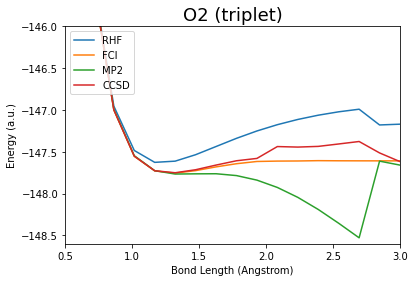

In [7]:
import matplotlib.pyplot as plt
plt.title("O2 (triplet)", fontsize=18)
plt.xlabel("Bond Length (Angstrom)")  
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_RHF, label = 'RHF')
plt.plot(distance, energy_FCI, label = 'FCI')
plt.plot(distance, energy_MP2, label = 'MP2')
plt.plot(distance, energy_CCSD, label = 'CCSD')
plt.legend(loc = 2)
plt.ylim(-148.6, -146.0)
plt.xlim(0.5, 3.0)
plt.show()

## UHF UCCSD

In [8]:
nb = mol.nao_nr()
dm = np.zeros((2,nb,nb)) 
# O1 [1s2,2s2,2p4]
dm[:,0,0] = 1 # 1s
dm[:,1,1] = 1 # 2s
dm[:,2,2] = 1 # 2p
dm[0,3,3] = 1 
dm[0,4,4] = 1
# O2
dm[:,5,5] = 1
dm[:,6,6] = 1
dm[:,7,7] = 1
dm[1,8,8] = 1
dm[1,9,9] = 1

In [9]:
dmU = dm.copy()
distance0 = distance
eUHF0 = []
energy_UCCSD0 = []
for i,R in enumerate(distance):
    mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' 
    mol.spin = 2
    mol.verbose = 5
    mol.build()
    
    print("R = ",R)    
    molUHF = scf.UHF(mol) 
    eUHF = molUHF.kernel(dm0=dmU)
    dmU = molUHF.make_rdm1()
    eUHF0.append(eUHF)
    
    molUCCSD = cc.UCCSD(molUHF)
    UCCSD0 = molUCCSD.kernel()[0] + eUHF      
    energy_UCCSD0.append(UCCSD0)
    
dmU = dm.copy()
distance1 = distance[-1::-1]
eUHF1 = []
energy_UCCSD1 = []
for i,R in enumerate(distance1):
    mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' 
    mol.spin = 2
    mol.verbose = 5
    mol.build()
    
    print("R = ",R)
    
    molUHF = scf.UHF(mol) 
    eUHF = molUHF.kernel(dm0=dmU)
    dmU = molUHF.make_rdm1()
    eUHF1.append(eUHF)
    
    molUCCSD = cc.UCCSD(molUHF)
    UCCSD1 = molUCCSD.kernel()[0] + eUHF          
    energy_UCCSD1.append(UCCSD1)

dmU = dm.copy()
distance2 = distance[-1::-1]
eUHF2 = []
energy_UCCSD2 = []
for i,R in enumerate(distance2):
    mol.atom = [['O',(0.0, 0.0, 0.0)],['O',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' 
    mol.spin = 0
    mol.verbose = 5
    mol.build()
    
    print("R = ",R)
    
    molUHF = scf.UHF(mol) 
    eUHF = molUHF.kernel(dm0=dmU)
    dmU = molUHF.make_rdm1()
    eUHF2.append(eUHF)
    
    molUCCSD = cc.UCCSD(molUHF)
    UCCSD2 = molUCCSD.kernel()[0] + eUHF      
    energy_UCCSD2.append(UCCSD2)


R =  0.1


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmppeql3shd
max_memory 4000 MB (current use 306 MB)
number electrons alpha = 9  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -464.73563007847963  Ecoul = 118.67703999054926
init E= -7.38517509913038
cond(S) = 1961.1894573607
    CPU time for initialize scf      1.83 sec, wall time      0.03 sec
  alpha nocc = 9  HOMO = 1.52241507287426  LUMO = 11.588884308632
  beta  nocc = 7  HOMO = 1.24621504525942  LUMO = 1.51567988345136

WARN: system HOMO 1.52241507287428 >= system LUMO 1.51567988345136

  alpha mo_energy =
[-50.95697986 -13.36036675  -4.25410056  -3.19630404  -2.56264642
  -0.63405456   1.24621505   1.5

multiplicity <S^2> = 2.0006297  2S+1 = 3.0004198
E1 = -347.904226431564  Ecoul = 114.21230514595393
cycle= 1 E= -99.6336945192101  delta_E= -220  |g|= 4.46  |ddm|=  101
    CPU time for cycle= 1      3.20 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = 0.324458162989293  LUMO = 7.53729163975966
  beta  nocc = 7  HOMO = 0.210072121610019  LUMO = 1.20549832795946
  alpha mo_energy =
[-29.91410103 -22.92752769  -2.67217154  -2.37589097  -2.37589097
  -1.16695674   0.14911997   0.32445816   0.32445816   7.53729164]
  beta  mo_energy =
[-29.89860927 -22.90952017  -2.53585451  -2.21001056  -2.21001056
  -0.91301699   0.21007212   1.20549833   1.20549833   7.62368127]
multiplicity <S^2> = 2.0000365  2S+1 = 3.0000243
E1 = -352.94940942407356  Ecoul = 117.54100168205137
cycle= 2 E= -101.350180975622  delta_E= -1.72  |g|= 0.21  |ddm|= 37.4
    CPU time for cycle= 2      2.81 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.455015191831562  LUMO = 7.76165914355832
  beta  nocc = 7  H

multiplicity <S^2> = 2.000009  2S+1 = 3.000006
E1 = -325.1567874148403  Ecoul = 110.16876058726842
cycle= 4 E= -131.419262090076  delta_E= -3.36e-08  |g|= 8.44e-06  |ddm|= 0.00134
    CPU time for cycle= 4      0.83 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = 0.180846514319735  LUMO = 7.87479451569716
  beta  nocc = 7  HOMO = -0.7017384773864  LUMO = 1.02755954404396
  alpha mo_energy =
[-23.26703617 -21.96903796  -2.29977576  -1.8222633   -1.8222633
  -1.04600333  -0.78831822   0.18084651   0.18084651   7.87479452]
  beta  mo_energy =
[-23.22899738 -21.92373967  -2.19659903  -1.64588919  -1.64588919
  -0.82341062  -0.70173848   1.02755954   1.02755954   7.94251425]
multiplicity <S^2> = 2.000009  2S+1 = 3.000006
E1 = -325.15678520850537  Ecoul = 110.16875838092956
cycle= 5 E= -131.41926209008  delta_E= -3.92e-12  |g|= 2.9e-07  |ddm|= 1.21e-05
    CPU time for cycle= 5      0.87 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = 0.180846513439212  LUMO = 7.87479462655439
  

CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 306 MB)
E1 = -305.51299626856314  Ecoul = 103.23277949946493
Init t2, MP2 energy = -0.0116368957996624
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0116368957996625
cycle = 1  E_corr(CCSD) = -0.0132150382247596  dE = -0.00157814243  norm(t1,t2) = 0.00734019
    CPU time for CCSD iter      8.83 sec, wall time      0.14 sec
cycle = 2  E_corr(CCSD) = -0.0134842516446324  dE = -0.00026921342  norm(t1,t2) = 0.00173259
    CPU time for CCSD iter      9.31 sec, wall time      0.15 sec
cycle = 3  E_corr(CCSD) = -0.0135593838453428  dE = -7.51322007e-05  norm(t1,t2) = 0.000461701
    CPU time for CCSD iter      9.07 sec, wall time      0.15 sec
cycle = 4  E_corr(CCSD) = -0.0135575715249501  dE = 1.81232039e-06  norm(t1,t2) = 1.85326e-05
    CPU tim

chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpjwie2hhh
max_memory 4000 MB (current use 306 MB)
number electrons alpha = 9  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -283.5107143901897  Ecoul = 96.93277651909634
init E= -147.341383695562
cond(S) = 18.56772302316933
    CPU time for initialize scf      6.46 sec, wall time      0.09 sec
  alpha nocc = 9  HOMO = -0.155585439575483  LUMO = 1.93463047952801
  beta  nocc = 7  HOMO = -0.437258705945903  LUMO = 0.770461343634969
  alpha mo_energy =
[-20.21291797 -20.20969373  -1.80667407  -0.81583884  -0.72289263
  -0.72289263  -0.55863301  -0.15558544  -0.15558544   1.93463048]
  beta  mo_energy =
[-20.16910232 -20.16901267  -1.68883373  -0.55342397  -0.4376433
  -0.4376433   -0.43725871   0.77046134   0.77046134   2.08154727]
multiplicity <S^2> = 2.0029584  2S+1 = 3.0019716
E1 = -278.68864733598775  Ecoul = 92.49659956771006
cycle= 1 E= -146.955493592746  delta_E= 0.386  |g|= 0.0303  |ddm|= 0.583
    CPU time for 

E1 = -269.345833488005  Ecoul = 88.51902005882832
cycle= 1 E= -147.485907290383  delta_E= 0.0726  |g|= 0.0186  |ddm|= 0.365
    CPU time for cycle= 1      3.01 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.355098749230003  LUMO = 1.1088620113499
  beta  nocc = 7  HOMO = -0.598250688026159  LUMO = 0.364420323594264
  alpha mo_energy =
[-20.50130875 -20.50107921  -1.84486394  -1.04185005  -0.84774442
  -0.84774442  -0.68359959  -0.35509875  -0.35509875   1.10886201]
  beta  mo_energy =
[-20.46810605 -20.46691986  -1.730499    -0.85061556  -0.61692045
  -0.59825069  -0.59825069   0.36442032   0.36442032   1.21542862]
multiplicity <S^2> = 2.0032269  2S+1 = 3.0021505
E1 = -269.3593680847983  Ecoul = 88.53236041267935
cycle= 2 E= -147.486101533325  delta_E= -0.000194  |g|= 0.00443  |ddm|= 0.032
    CPU time for cycle= 2      2.90 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.354369792621463  LUMO = 1.1099079342515
  beta  nocc = 7  HOMO = -0.597378535266874  LUMO = 0.36

E1 = -261.90835991046566  Ecoul = 85.29480731473012
cycle= 2 E= -147.627990051649  delta_E= -5.77e-05  |g|= 0.00265  |ddm|= 0.0142
    CPU time for cycle= 2      2.92 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.403583593378381  LUMO = 0.758258630245882
  beta  nocc = 7  HOMO = -0.471560779092089  LUMO = 0.287994880828139
  alpha mo_energy =
[-20.45065812 -20.44961727  -1.65978603  -1.08050706  -0.73897948
  -0.73897948  -0.62312608  -0.40358359  -0.40358359   0.75825863]
  beta  mo_energy =
[-20.41851437 -20.41850082  -1.53213048  -0.88805034  -0.56797265
  -0.47156078  -0.47156078   0.28799488   0.28799488   0.85160974]
multiplicity <S^2> = 2.0034672  2S+1 = 3.0023105
E1 = -261.9105713277358  Ecoul = 85.29701316610102
cycle= 3 E= -147.627995617548  delta_E= -5.57e-06  |g|= 0.000536  |ddm|= 0.00514
    CPU time for cycle= 3      2.98 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.403504972752938  LUMO = 0.758395966666635
  beta  nocc = 7  HOMO = -0.47154172709421

E1 = -255.89651156080816  Ecoul = 82.64662801365472
cycle= 3 E= -147.613250540033  delta_E= -2.83e-06  |g|= 0.000645  |ddm|= 0.00282
    CPU time for cycle= 3      0.62 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.436243259823794  LUMO = 0.529914132110232
  beta  nocc = 7  HOMO = -0.378645144623572  LUMO = 0.230941991755085
  alpha mo_energy =
[-20.41900266 -20.4178902   -1.52467486  -1.11527691  -0.66251497
  -0.66251497  -0.56645459  -0.43624326  -0.43624326   0.52991413]
  beta  mo_energy =
[-20.3886953  -20.38834692  -1.38605398  -0.92237164  -0.51946868
  -0.37864514  -0.37864514   0.23094199   0.23094199   0.61136891]
multiplicity <S^2> = 2.0032768  2S+1 = 3.0021837
E1 = -255.8966604954775  Ecoul = 82.6467764851305
cycle= 4 E= -147.613251003227  delta_E= -4.63e-07  |g|= 1.4e-05  |ddm|= 0.00168
    CPU time for cycle= 4      2.91 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.436246416171144  LUMO = 0.529910956788671
  beta  nocc = 7  HOMO = -0.3786502708177 

  beta  mo_energy =
[-20.36708696 -20.36669089  -1.28221544  -0.951366    -0.46889319
  -0.3103365   -0.3103365    0.18853819   0.18853819   0.44754501]
multiplicity <S^2> = 2.002762  2S+1 = 3.0018408
E1 = -250.96951529561608  Ecoul = 80.45229238643145
cycle= 5 E= -147.535812606373  delta_E= -2.95e-09  |g|= 4.81e-08  |ddm|= 0.000119
    CPU time for cycle= 5      0.77 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.457705829441967  LUMO = 0.375609673950107
  beta  nocc = 7  HOMO = -0.310336512703194  LUMO = 0.18853817940862
  alpha mo_energy =
[-20.39599795 -20.39502546  -1.42901208  -1.14332755  -0.60887332
  -0.60887332  -0.51148351  -0.45770583  -0.45770583   0.37560967]
  beta  mo_energy =
[-20.36708699 -20.36669092  -1.28221547  -0.95136606  -0.46889323
  -0.31033651  -0.31033651   0.18853818   0.18853818   0.44754504]
multiplicity <S^2> = 2.002762  2S+1 = 3.0018408
E1 = -250.96951530284224  Ecoul = 80.45229239365761
cycle= 6 E= -147.535812606373  delta_E=    0  |g|= 5.58

E1 = -246.8756187517173  Ecoul = 78.61350788620823
cycle= 5 E= -147.43753195034  delta_E= -8.4e-09  |g|= 2.46e-08  |ddm|= 0.000198
    CPU time for cycle= 5      2.96 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.458789531293882  LUMO = 0.267291674085433
  beta  nocc = 7  HOMO = -0.26004760375164  LUMO = 0.157057646519282
  alpha mo_energy =
[-20.37792855 -20.37715198  -1.36260665  -1.16440873  -0.57149131
  -0.57149131  -0.47140179  -0.47140179  -0.45878953   0.26729167]
  beta  mo_energy =
[-20.35004426 -20.34970561  -1.20997533  -0.97448691  -0.41762406
  -0.2600476   -0.2600476    0.15705765   0.15705765   0.33201125]
multiplicity <S^2> = 2.0021034  2S+1 = 3.0014019
E1 = -246.87561875402858  Ecoul = 78.61350788851954
cycle= 6 E= -147.43753195034  delta_E= 2.84e-14  |g|= 7.21e-10  |ddm|= 5.56e-08
    CPU time for cycle= 6      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.458789531634683  LUMO = 0.267291670492371
  beta  nocc = 7  HOMO = -0.260047603426108

multiplicity <S^2> = 2.0014792  2S+1 = 3.000986
E1 = -243.43558149761952  Ecoul = 77.0583032832312
cycle= 5 E= -147.339423525669  delta_E= -6.32e-09  |g|= 6.52e-08  |ddm|= 0.000166
    CPU time for cycle= 5      2.95 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.41024810982938  LUMO = 0.189609966296284
  beta  nocc = 7  HOMO = -0.22262296089864  LUMO = 0.133790007462772
  alpha mo_energy =
[-20.36282767 -20.36224881  -1.31684013  -1.17947505  -0.54539506
  -0.54539506  -0.47965134  -0.47965134  -0.41024811   0.18960997]
  beta  mo_energy =
[-20.33566445 -20.33541828  -1.15990266  -0.99213174  -0.36887923
  -0.22262296  -0.22262296   0.13379001   0.13379001   0.24908503]
multiplicity <S^2> = 2.0014792  2S+1 = 3.000986
E1 = -243.43558149889506  Ecoul = 77.05830328450665
cycle= 6 E= -147.339423525669  delta_E= -8.53e-14  |g|= 1.12e-07  |ddm|= 1.65e-07
    CPU time for cycle= 6      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.410248105839511  LUMO = 0.189609981

  beta  nocc = 7  HOMO = -0.194198607202441  LUMO = 0.116670072640362
  alpha mo_energy =
[-20.34965342 -20.34924239  -1.28511591  -1.18978571  -0.52692061
  -0.52692061  -0.48409205  -0.48409205  -0.3673655    0.13325172]
  beta  mo_energy =
[-20.32298468 -20.3228132   -1.12485194  -1.00509248  -0.32509437
  -0.19419861  -0.19419861   0.11667007   0.11667007   0.18899908]
multiplicity <S^2> = 2.0009747  2S+1 = 3.0006497
E1 = -240.51703637249835  Ecoul = 75.73232905183418
cycle= 5 E= -147.251206272198  delta_E= 6.17e-09  |g|= 0.000122  |ddm|= 0.000164
    CPU time for cycle= 5      0.92 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.367361909554276  LUMO = 0.133255106843674
  beta  nocc = 7  HOMO = -0.194195748597635  LUMO = 0.1166724241466
  alpha mo_energy =
[-20.34964463 -20.3492422   -1.28511122  -1.18978445  -0.52691714
  -0.52691714  -0.48408896  -0.48408896  -0.36736191   0.13325511]
  beta  mo_energy =
[-20.32297003 -20.3228195   -1.12484937  -1.00509218  -0.32508541


multiplicity <S^2> = 2.0007077  2S+1 = 3.0004717
E1 = -238.0169424048808  Ecoul = 74.59159732422316
cycle= 2 E= -147.175863048367  delta_E= -3.59e-06  |g|= 0.000828  |ddm|= 0.00209
    CPU time for cycle= 2      1.63 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.330410127240654  LUMO = 0.0917235795321057
  beta  nocc = 7  HOMO = -0.172083435002577  LUMO = 0.104080738992079
  alpha mo_energy =
[-20.33806097 -20.33780273  -1.26285432  -1.19656115  -0.51358698
  -0.51358698  -0.48597325  -0.48597325  -0.33041013   0.09172358]
  beta  mo_energy =
[-20.31169574 -20.31162783  -1.0998957   -1.01426611  -0.28727173
  -0.17208344  -0.17208344   0.10408074   0.10408074   0.14497051]
multiplicity <S^2> = 2.0006532  2S+1 = 3.0004354
E1 = -238.0170331069075  Ecoul = 74.59168713117498
cycle= 3 E= -147.175863943442  delta_E= -8.95e-07  |g|= 0.000386  |ddm|= 0.00118
    CPU time for cycle= 3      0.71 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.330504566852785  LUMO = 0.0917850

    CPU time for CCSD iter      6.45 sec, wall time      0.11 sec
cycle = 31  E_corr(CCSD) = -0.289348554591249  dE = -0.0107818504  norm(t1,t2) = 0.118999
    CPU time for CCSD iter      9.42 sec, wall time      0.15 sec
cycle = 32  E_corr(CCSD) = -0.288526402528529  dE = 0.000822152063  norm(t1,t2) = 0.106623
    CPU time for CCSD iter      9.45 sec, wall time      0.15 sec
cycle = 33  E_corr(CCSD) = -0.290425521317327  dE = -0.00189911879  norm(t1,t2) = 0.106608
    CPU time for CCSD iter      7.11 sec, wall time      0.11 sec
cycle = 34  E_corr(CCSD) = -0.292003505774305  dE = -0.00157798446  norm(t1,t2) = 0.106338
    CPU time for CCSD iter      6.63 sec, wall time      0.11 sec
cycle = 35  E_corr(CCSD) = -0.237597695313967  dE = 0.0544058105  norm(t1,t2) = 0.108686
    CPU time for CCSD iter      9.12 sec, wall time      0.14 sec
cycle = 36  E_corr(CCSD) = -0.206709441091115  dE = 0.0308882542  norm(t1,t2) = 0.404289
    CPU time for CCSD iter      6.44 sec, wall time      0.11 s

  beta  nocc = 7  HOMO = -0.15456264254719  LUMO = 0.0946867332447402
  alpha mo_energy =
[-20.32810629 -20.32795377  -1.24694249  -1.20076579  -0.50379197
  -0.50379197  -0.48621201  -0.48621201  -0.29937944   0.06071463]
  beta  mo_energy =
[-20.30196043 -20.30194088  -1.08198643  -1.02058444  -0.25499455
  -0.15456271  -0.15456264   0.09468673   0.0946868    0.11202375]
multiplicity <S^2> = 2.0003634  2S+1 = 3.0002422
E1 = -235.8541595272488  Ecoul = 73.60018789603228
cycle= 7 E= -147.113277784658  delta_E= -4.65e-08  |g|= 0.000188  |ddm|= 0.000265
    CPU time for cycle= 7      2.99 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.299386632501086  LUMO = 0.0607140663084246
  beta  nocc = 7  HOMO = -0.154564924381275  LUMO = 0.0946837565839423
  alpha mo_energy =
[-20.32810788 -20.3279584   -1.24694517  -1.200766    -0.50379436
  -0.50379436  -0.48621417  -0.48621417  -0.29938663   0.06071407]
  beta  mo_energy =
[-20.30195668 -20.3019512   -1.08199003  -1.0205853   -0.25499

    CPU time for CCSD iter      9.28 sec, wall time      0.14 sec
cycle = 33  E_corr(CCSD) = -0.324025341324023  dE = 0.00731918174  norm(t1,t2) = 0.0607667
    CPU time for CCSD iter      6.63 sec, wall time      0.11 sec
cycle = 34  E_corr(CCSD) = -0.323222057859899  dE = 0.000803283464  norm(t1,t2) = 0.0672808
    CPU time for CCSD iter      6.67 sec, wall time      0.11 sec
cycle = 35  E_corr(CCSD) = -0.327346208381445  dE = -0.00412415052  norm(t1,t2) = 0.0684612
    CPU time for CCSD iter      9.45 sec, wall time      0.15 sec
cycle = 36  E_corr(CCSD) = -0.370294124844874  dE = -0.0429479165  norm(t1,t2) = 0.0633639
    CPU time for CCSD iter      6.48 sec, wall time      0.11 sec
cycle = 37  E_corr(CCSD) = -0.337814105618302  dE = 0.0324800192  norm(t1,t2) = 0.15531
    CPU time for CCSD iter      9.06 sec, wall time      0.14 sec
cycle = 38  E_corr(CCSD) = -0.326240083312448  dE = 0.0115740223  norm(t1,t2) = 0.061397
    CPU time for CCSD iter      6.86 sec, wall time      0.11

  beta  mo_energy =
[-20.29397597 -20.29393937  -1.06901297  -1.02480394  -0.22832878
  -0.14051935  -0.14051935   0.0871345    0.08748411   0.08748412]
multiplicity <S^2> = 2.0002106  2S+1 = 3.0001404
E1 = -233.9640112668157  Ecoul = 72.72808426831426
cycle= 7 E= -147.062369983552  delta_E= 1e-08  |g|= 3.3e-06  |ddm|= 0.000199
    CPU time for cycle= 7      3.00 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.273566883428262  LUMO = 0.0370809502095056
  beta  nocc = 7  HOMO = -0.140519349952118  LUMO = 0.0871344827707311
  alpha mo_energy =
[-20.31996534 -20.31989191  -1.23556932  -1.20330376  -0.49662569
  -0.49662569  -0.48559717  -0.48559717  -0.27356688   0.03708095]
  beta  mo_energy =
[-20.29397597 -20.29393937  -1.06901296  -1.02480393  -0.22832878
  -0.14051935  -0.14051935   0.08713448   0.08748412   0.08748412]
multiplicity <S^2> = 2.0002106  2S+1 = 3.0001404
E1 = -233.96401126587375  Ecoul = 72.72808426739186
cycle= 8 E= -147.062369983532  delta_E= 1.96e-11  |g|= 2

    CPU time for CCSD iter      9.22 sec, wall time      0.14 sec
cycle = 39  E_corr(CCSD) = -0.365615741502329  dE = -0.00969173722  norm(t1,t2) = 0.0332742
    CPU time for CCSD iter      9.24 sec, wall time      0.15 sec
cycle = 40  E_corr(CCSD) = -0.377698958175514  dE = -0.0120832167  norm(t1,t2) = 0.0223269
    CPU time for CCSD iter      6.06 sec, wall time      0.10 sec
cycle = 41  E_corr(CCSD) = -0.388968262976526  dE = -0.0112693048  norm(t1,t2) = 0.0244289
    CPU time for CCSD iter      9.55 sec, wall time      0.15 sec
cycle = 42  E_corr(CCSD) = -0.359942899327031  dE = 0.0290253636  norm(t1,t2) = 0.0418196
    CPU time for CCSD iter      9.09 sec, wall time      0.15 sec
cycle = 43  E_corr(CCSD) = -0.357837587084694  dE = 0.00210531224  norm(t1,t2) = 0.0273271
    CPU time for CCSD iter      9.84 sec, wall time      0.16 sec
cycle = 44  E_corr(CCSD) = -0.365471748028845  dE = -0.00763416094  norm(t1,t2) = 0.0300185
    CPU time for CCSD iter      9.20 sec, wall time      

multiplicity <S^2> = 2.0001211  2S+1 = 3.0000807
E1 = -232.2969133969019  Ecoul = 71.95256321523931
cycle= 8 E= -147.021793484381  delta_E= 4.63e-09  |g|= 2.22e-06  |ddm|= 0.000135
    CPU time for cycle= 8      3.02 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
  alpha nocc = 9  HOMO = -0.25257171976398  LUMO = 0.0189456942141925
  beta  nocc = 7  HOMO = -0.129188607901793  LUMO = 0.0681459871481634
  alpha mo_energy =
[-2.03136257e+01 -2.03136015e+01 -1.22742634e+00 -1.20477402e+00
 -4.91428460e-01 -4.91428460e-01 -4.84613934e-01 -4.84613934e-01
 -2.52571720e-01  1.89456942e-02]
  beta  mo_energy =
[-20.28773636 -20.28767533  -1.05965205  -1.02758254  -0.20667929
  -0.12918861  -0.12918861   0.06814599   0.08171628   0.08171628]
multiplicity <S^2> = 2.0001211  2S+1 = 3.0000807
E1 = -232.29691340048353  Ecoul = 71.95256321871923
cycle= 9 E= -147.021793484482  delta_E= -1.02e-10  |g|= 7.69e-06  |ddm|= 1.45e-05
    CPU time for cycle= 9      3.05 sec, wall 

cycle = 39  E_corr(CCSD) = -0.383443520662155  dE = -2.52400068e-05  norm(t1,t2) = 0.00993551
    CPU time for CCSD iter      6.52 sec, wall time      0.11 sec
cycle = 40  E_corr(CCSD) = -0.382593745461124  dE = 0.000849775201  norm(t1,t2) = 0.00993697
    CPU time for CCSD iter      8.48 sec, wall time      0.14 sec
cycle = 41  E_corr(CCSD) = -0.382143355948214  dE = 0.000450389513  norm(t1,t2) = 0.00897132
    CPU time for CCSD iter      9.16 sec, wall time      0.15 sec
cycle = 42  E_corr(CCSD) = -0.381993732813678  dE = 0.000149623135  norm(t1,t2) = 0.00899235
    CPU time for CCSD iter      8.22 sec, wall time      0.13 sec
cycle = 43  E_corr(CCSD) = -0.382606575256093  dE = -0.000612842442  norm(t1,t2) = 0.00913269
    CPU time for CCSD iter      6.87 sec, wall time      0.11 sec
cycle = 44  E_corr(CCSD) = -0.382097008037153  dE = 0.000509567219  norm(t1,t2) = 0.00939495
    CPU time for CCSD iter      9.01 sec, wall time      0.15 sec
cycle = 45  E_corr(CCSD) = -0.38434192096512

multiplicity <S^2> = 2.0000701  2S+1 = 3.0000468
E1 = -230.81447737372446  Ecoul = 71.25650871624347
cycle= 8 E= -146.990009898131  delta_E= 3.9e-08  |g|= 4.47e-05  |ddm|= 0.000409
    CPU time for cycle= 8      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.235823559009797  LUMO = 0.00495666152879949
  beta  nocc = 7  HOMO = -0.119995281492086  LUMO = 0.0535814230899842
  alpha mo_energy =
[-2.03089293e+01 -2.03089242e+01 -1.22164148e+00 -1.20560744e+00
 -4.87730603e-01 -4.87730603e-01 -4.83579875e-01 -4.83579875e-01
 -2.35823559e-01  4.95666153e-03]
  beta  mo_energy =
[-20.28309103 -20.28301864  -1.05295225  -1.02940779  -0.18945288
  -0.11999528  -0.11999528   0.05358142   0.07686216   0.07686216]
multiplicity <S^2> = 2.0000701  2S+1 = 3.0000467
E1 = -230.81447732985652  Ecoul = 71.25650867567336
cycle= 9 E= -146.990009894833  delta_E= 3.3e-09  |g|= 7.34e-07  |ddm|= 0.00011
    CPU time for cycle= 9      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.2

    CPU time for CCSD iter      9.41 sec, wall time      0.15 sec
cycle = 36  E_corr(CCSD) = -1189.4554677861  dE = -1150.96445  norm(t1,t2) = 15017.8
    CPU time for CCSD iter      7.25 sec, wall time      0.12 sec
cycle = 37  E_corr(CCSD) = -2355.71754375472  dE = -1166.26208  norm(t1,t2) = 2.23447e+07
    CPU time for CCSD iter      9.12 sec, wall time      0.15 sec
cycle = 38  E_corr(CCSD) = 9158.91913355992  dE = 11514.6367  norm(t1,t2) = 5.33545e+07
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = 0  dE = -9158.91913  norm(t1,t2) = 1.42059e+08
    CPU time for CCSD iter      9.24 sec, wall time      0.15 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.61869
    CPU time for CCSD iter      5.00 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.61869
    CP

  beta  mo_energy =
[-20.27977851 -20.27970342  -1.04820059  -1.03061894  -0.17592908
  -0.11247183  -0.11247177   0.04233728   0.07259666   0.07259668]
multiplicity <S^2> = 2.0000422  2S+1 = 3.0000281
E1 = -229.4869752978  Ecoul = 70.6273484074001
cycle= 7 E= -146.965366474897  delta_E= -5.99e-10  |g|= 0.000109  |ddm|= 4.01e-06
    CPU time for cycle= 7      3.16 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.22263519160456  LUMO = -0.00590492294314498
  beta  nocc = 7  HOMO = -0.112472617892692  LUMO = 0.0423353898240896
  alpha mo_energy =
[-2.03056041e+01 -2.03055833e+01 -1.21757574e+00 -1.20607801e+00
 -4.85154386e-01 -4.85154384e-01 -4.82657947e-01 -4.82657945e-01
 -2.22635192e-01 -5.90492294e-03]
  beta  mo_energy =
[-20.27977938 -20.27970432  -1.04820171  -1.03061989  -0.17592849
  -0.11247264  -0.11247262   0.04233539   0.07259579   0.0725958 ]
multiplicity <S^2> = 2.0000416  2S+1 = 3.0000277
E1 = -229.48697366543115  Ecoul = 70.62734679222156
cycle= 8 E= -146.965366

cycle = 24  E_corr(CCSD) = 2.43434678546751  dE = -0.365138365  norm(t1,t2) = 2.19986
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
cycle = 25  E_corr(CCSD) = 2.9130915761407  dE = 0.478744791  norm(t1,t2) = 8.74157
    CPU time for CCSD iter      6.45 sec, wall time      0.11 sec
cycle = 26  E_corr(CCSD) = 2.86086780892216  dE = -0.0522237672  norm(t1,t2) = 8.48953
    CPU time for CCSD iter      6.60 sec, wall time      0.11 sec
cycle = 27  E_corr(CCSD) = 2.65738083783648  dE = -0.203486971  norm(t1,t2) = 19.697
    CPU time for CCSD iter      9.47 sec, wall time      0.15 sec
cycle = 28  E_corr(CCSD) = 3.19124514071041  dE = 0.533864303  norm(t1,t2) = 9.30626
    CPU time for CCSD iter      9.49 sec, wall time      0.15 sec
cycle = 29  E_corr(CCSD) = 3.36181770057147  dE = 0.17057256  norm(t1,t2) = 16.3025
    CPU time for CCSD iter      9.44 sec, wall time      0.15 sec
cycle = 30  E_corr(CCSD) = 1.71223696597185  dE = -1.64958073  norm(t1,t2) = 17.5612
    CPU 

multiplicity <S^2> = 2.0000258  2S+1 = 3.0000172
E1 = -228.29108875021012  Ecoul = 70.0557107864241
cycle= 5 E= -146.946264130826  delta_E= -5.99e-09  |g|= 6.16e-05  |ddm|= 0.000118
    CPU time for cycle= 5      1.04 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.212287409829401  LUMO = -0.0144335486436077
  beta  nocc = 7  HOMO = -0.10624033539569  LUMO = 0.0335523899052907
  alpha mo_energy =
[-2.03033219e+01 -2.03032906e+01 -1.21474893e+00 -1.20634787e+00
 -4.83394411e-01 -4.83394411e-01 -4.81908085e-01 -4.81908085e-01
 -2.12287410e-01 -1.44335486e-02]
  beta  mo_energy =
[-20.27750235 -20.27742841  -1.04485941  -1.03144309  -0.16535135
  -0.10624034  -0.10624034   0.03355239   0.06872889   0.06872889]
multiplicity <S^2> = 2.0000257  2S+1 = 3.0000171
E1 = -228.29108862265178  Ecoul = 70.05571066699355
cycle= 6 E= -146.946264122698  delta_E= 8.13e-09  |g|= 6.12e-05  |ddm|= 0.000134
    CPU time for cycle= 6      3.18 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0

cycle = 30  E_corr(CCSD) = 0  dE = 2993.12383  norm(t1,t2) = 2.70477e+08
    CPU time for CCSD iter      9.27 sec, wall time      0.15 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.96887
    CPU time for CCSD iter      6.90 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.96887
    CPU time for CCSD iter      8.47 sec, wall time      0.14 sec
Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.96887
    CPU time for CCSD iter      9.34 sec, wall time      0.15 sec
Linear dependence found in DIIS error vectors.
cycle = 34  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.96887
    CPU time for CCSD iter      3.13 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = 0  dE = 0  norm(t1,t2) = 1.96887
    CPU time for CCSD iter      6.72 sec, wall time      0.11 

  beta  mo_energy =
[-2.03064413e+01 -2.02393824e+01 -1.13224932e+00 -9.38048129e-01
 -5.09539930e-01 -4.85709837e-02 -4.78122834e-02  1.61756795e-02
  1.68147015e-02  3.83295447e-01]
multiplicity <S^2> = 2.9999938  2S+1 = 3.6055479
E1 = -228.35030233141055  Ecoul = 70.01213530781999
cycle= 6 E= -147.049053190631  delta_E= 0.00025  |g|= 0.0301  |ddm|= 0.0121
    CPU time for cycle= 6      3.17 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.0831922920050255  LUMO = 0.70430741663006
  beta  nocc = 7  HOMO = -0.181400657229309  LUMO = 0.146078927919625
  alpha mo_energy =
[-20.85848407 -19.73903446  -1.65851481  -0.92291313  -0.87633031
  -0.87616964  -0.75678987  -0.08583356  -0.08319229   0.70430742]
  beta  mo_energy =
[-20.79192961 -19.75415844  -1.21299819  -0.85740794  -0.33062036
  -0.1824739   -0.18140066   0.14607893   0.15070704   0.20764531]
multiplicity <S^2> = 3  2S+1 = 3.6055513
E1 = -228.31099670723478  Ecoul = 70.07388582400452
cycle= 7 E= -146.94799705027  delta

  beta  mo_energy =
[-20.7295982  -19.81472248  -1.08153451  -0.98786748  -0.29298958
  -0.26599737  -0.14123213   0.10808211   0.1132849    0.29589487]
multiplicity <S^2> = 2.9999986  2S+1 = 3.6055505
E1 = -228.34333756677208  Ecoul = 69.99980139539454
cycle= 18 E= -147.054422338418  delta_E= -0.000403  |g|= 0.0538  |ddm|= 0.0274
    CPU time for cycle= 18      3.00 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.359277431474007  LUMO = 1.07589344430003
  beta  nocc = 7  HOMO = -0.146012400507673  LUMO = 0.114895661169304

WARN: system HOMO 0.185102585517632 >= system LUMO 0.114895661169304

  alpha mo_energy =
[-21.45940391 -19.13713245  -2.0596523   -1.31763444  -1.29651465
  -1.29047947  -0.35536501   0.33299843   0.35927743   1.07589344]
  beta  mo_energy =
[-21.37671606 -19.16893118  -1.50740381  -0.56613947  -0.31119964
  -0.30004488  -0.1460124    0.11489566   0.18510259   0.27431352]
multiplicity <S^2> = 2.0000002  2S+1 = 3.0000001
E1 = -228.3591106409135  Ecoul = 71.9

multiplicity <S^2> = 2.9999977  2S+1 = 3.60555
E1 = -228.34871506536348  Ecoul = 70.00968024258964
cycle= 29 E= -147.049920989814  delta_E= 0.00761  |g|= 0.0338  |ddm|= 0.124
    CPU time for cycle= 29      3.05 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.17053759841417  LUMO = 0.97755252126855
  beta  nocc = 7  HOMO = -0.188251925637461  LUMO = 0.182639941982612
  alpha mo_energy =
[-20.65862632 -19.937435    -1.60919803  -1.19074024  -0.80457986
  -0.79277836  -0.78601535  -0.1714107   -0.1705376    0.97755252]
  beta  mo_energy =
[-20.5695404  -19.97503909  -1.05452492  -1.01372794  -0.38504301
  -0.21173301  -0.18825193   0.18263994   0.20806732   0.21041099]
multiplicity <S^2> = 2.9999945  2S+1 = 3.6055482
E1 = -228.34466366513837  Ecoul = 70.00197446098176
cycle= 30 E= -147.053575371197  delta_E= -0.00365  |g|= 0.0509  |ddm|= 0.0631
    CPU time for cycle= 30      2.74 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.112025152699614  LUMO = 1.02264963641189
 

cycle= 40 E= -145.1204240667  delta_E= 0.000355  |g|= 0.0796  |ddm|= 0.00948
    CPU time for cycle= 40      3.00 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.295137596527234  LUMO = 1.01128575372128
  beta  nocc = 7  HOMO = -0.11206441527188  LUMO = 0.0828798186155658

WARN: system HOMO 0.199592883333339 >= system LUMO 0.0828798186155658

  alpha mo_energy =
[-21.37372597 -19.22284274  -2.00205176  -1.25249473  -1.24373925
  -1.23211062  -0.41294309   0.28515781   0.2951376    1.01128575]
  beta  mo_energy =
[-21.29312899 -19.25228926  -1.46246284  -0.60812477  -0.32534397
  -0.24322814  -0.11206442   0.08287982   0.19959288   0.21252731]
multiplicity <S^2> = 2.0000714  2S+1 = 3.0000476
E1 = -228.35996260674915  Ecoul = 71.91493969456886
cycle= 41 E= -145.15590907922  delta_E= -0.0355  |g|= 0.258  |ddm|= 0.169
    CPU time for cycle= 41      2.98 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.355431023829591  LUMO = 0.374197702121497
  beta  nocc = 7  HOMO = -0.11

    CPU time for CCSD iter      8.88 sec, wall time      0.14 sec
cycle = 4  E_corr(CCSD) = 0.0175443204566472  dE = 7.56613315e-05  norm(t1,t2) = 0.0559934
    CPU time for CCSD iter      5.21 sec, wall time      0.09 sec
cycle = 5  E_corr(CCSD) = 0.0176566039829988  dE = 0.000112283526  norm(t1,t2) = 0.00879642
    CPU time for CCSD iter      7.19 sec, wall time      0.12 sec
cycle = 6  E_corr(CCSD) = 0.0178280909419924  dE = 0.000171486959  norm(t1,t2) = 0.00567315
    CPU time for CCSD iter      7.07 sec, wall time      0.12 sec
cycle = 7  E_corr(CCSD) = 0.0178723349915274  dE = 4.42440495e-05  norm(t1,t2) = 0.00417538
    CPU time for CCSD iter      8.88 sec, wall time      0.14 sec
cycle = 8  E_corr(CCSD) = 0.0177616550820937  dE = -0.000110679909  norm(t1,t2) = 0.00429012
    CPU time for CCSD iter      9.23 sec, wall time      0.14 sec
cycle = 9  E_corr(CCSD) = 0.017767235755608  dE = 5.58067351e-06  norm(t1,t2) = 0.00301296
    CPU time for CCSD iter      9.49 sec, wall time  

E1 = -229.56610210189206  Ecoul = 70.59407799754638
init E= -147.077763688843
cond(S) = 1.6239514224877605
    CPU time for initialize scf      1.41 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = 0.174993247342608  LUMO = 0.912816908010591
  beta  nocc = 7  HOMO = -0.157811925714535  LUMO = 0.0341533208792896

WARN: system HOMO 0.129034799246535 >= system LUMO 0.0341533208792896

  alpha mo_energy =
[-21.21060345 -19.38434316  -1.89047055  -1.13154588  -1.1314306
  -1.12225873  -0.52258874   0.16746617   0.17499325   0.91281691]
  beta  mo_energy =
[-21.13421925 -19.40947357  -1.37832164  -0.68973357  -0.17998527
  -0.15793698  -0.15781193   0.03415332   0.1290348    0.15285248]
multiplicity <S^2> = 2.0000577  2S+1 = 3.0000385
E1 = -229.56818645000953  Ecoul = 72.48205201337157
cycle= 1 E= -145.191874021135  delta_E= 1.89  |g|= 0.25  |ddm|= 2.41
    CPU time for cycle= 1      0.76 sec, wall time      0.01 sec

WARN: alpha nocc = 9  HOMO 0.738354961273567 >= LUMO 0.73847535874118

multiplicity <S^2> = 2.9401893  2S+1 = 3.5722202
E1 = -229.5452843377683  Ecoul = 70.58717363451858
cycle= 12 E= -147.063850287747  delta_E= -1.82  |g|= 0.451  |ddm|= 2.25
    CPU time for cycle= 12      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.141414182590474  LUMO = 0.100512358674142
  beta  nocc = 7  HOMO = -0.228641065162898  LUMO = 0.17977323508508
  alpha mo_energy =
[-20.80829733 -19.79182947  -1.52052526  -0.89643013  -0.81461246
  -0.81185615  -0.33052425  -0.14477264  -0.14141418   0.10051236]
  beta  mo_energy =
[-20.77656885 -19.77174175  -1.30946954  -0.76241303  -0.27521613
  -0.26899915  -0.22864107   0.17977324   0.19842746   0.20437635]
multiplicity <S^2> = 2.000249  2S+1 = 3.000166
E1 = -229.5568026309017  Ecoul = 72.44338859929572
cycle= 13 E= -145.219153616103  delta_E= 1.84  |g|= 0.315  |ddm|= 1.48
    CPU time for cycle= 13      3.06 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.152444095657432  LUMO = -0.0677881404727862
  beta  no

multiplicity <S^2> = 2.9999808  2S+1 = 3.6055406
E1 = -229.5599098907657  Ecoul = 70.10501584720407
cycle= 24 E= -147.560633628058  delta_E= -0.00512  |g|= 0.0137  |ddm|= 0.115
    CPU time for cycle= 24      3.02 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.376634834523136  LUMO = 0.328184559078467
  beta  nocc = 7  HOMO = -0.347540615154996  LUMO = 0.318959937816719
  alpha mo_energy =
[-20.366409   -20.22857846  -1.32104465  -1.09132597  -0.58353547
  -0.57970523  -0.46369226  -0.45686918  -0.37663483   0.32818456]
  beta  mo_energy =
[-20.31563405 -20.22769414  -1.08555115  -0.98198177  -0.4619899
  -0.36368825  -0.34754062   0.31895994   0.32985216   0.34247954]
multiplicity <S^2> = 2.9999868  2S+1 = 3.605544
E1 = -229.56069892929366  Ecoul = 70.10546276702435
cycle= 25 E= -147.560975746766  delta_E= -0.000342  |g|= 0.0038  |ddm|= 0.032
    CPU time for cycle= 25      3.19 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.376832264139658  LUMO = 0.34583912179772

cycle = 17  E_corr(CCSD) = 0.0482554718031578  dE = 0.00577230218  norm(t1,t2) = 0.00564652
    CPU time for CCSD iter      9.55 sec, wall time      0.15 sec
cycle = 18  E_corr(CCSD) = 0.0474057710939127  dE = -0.000849700709  norm(t1,t2) = 0.000986202
    CPU time for CCSD iter      9.68 sec, wall time      0.15 sec
cycle = 19  E_corr(CCSD) = 0.0473724691691865  dE = -3.33019247e-05  norm(t1,t2) = 9.23082e-05
    CPU time for CCSD iter      6.33 sec, wall time      0.11 sec
cycle = 20  E_corr(CCSD) = 0.0473352851461285  dE = -3.71840231e-05  norm(t1,t2) = 0.000117471
    CPU time for CCSD iter      9.08 sec, wall time      0.14 sec
cycle = 21  E_corr(CCSD) = 0.0473923152346797  dE = 5.70300886e-05  norm(t1,t2) = 0.000152739
    CPU time for CCSD iter      9.16 sec, wall time      0.15 sec
cycle = 22  E_corr(CCSD) = 0.0479328569550936  dE = 0.00054054172  norm(t1,t2) = 9.81197e-05
    CPU time for CCSD iter      4.12 sec, wall time      0.07 sec
cycle = 23  E_corr(CCSD) = 0.04745026581

    CPU time for cycle= 2      2.96 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.409311254480892  LUMO = 0.326960771008765
  beta  nocc = 7  HOMO = -0.355892745383044  LUMO = 0.327194501010593
  alpha mo_energy =
[-20.30592531 -20.28856016  -1.28826898  -1.12371302  -0.54622078
  -0.54564934  -0.50566604  -0.45069719  -0.40931125   0.32696077]
  beta  mo_energy =
[-20.28851604 -20.25427834  -1.1236893   -0.94345322  -0.50567554
  -0.41079926  -0.35589275   0.3271945    0.3819321    0.38328358]
multiplicity <S^2> = 2.9999634  2S+1 = 3.605531
E1 = -230.9113390079723  Ecoul = 70.78249882650202
cycle= 3 E= -147.56088142212  delta_E= -2.25e-07  |g|= 4.16e-05  |ddm|= 0.000858
    CPU time for cycle= 3      2.96 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.409318629268797  LUMO = 0.326954196990096
  beta  nocc = 7  HOMO = -0.355891709000637  LUMO = 0.327187775809644
  alpha mo_energy =
[-20.30592393 -20.28856741  -1.28826805  -1.12371983  -0.5462198
  -0.54564854  -0.5

    CPU time for CCSD iter      9.39 sec, wall time      0.15 sec
cycle = 32  E_corr(CCSD) = 0.0474479128263292  dE = 2.58568554e-07  norm(t1,t2) = 4.94532e-05
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
cycle = 33  E_corr(CCSD) = 0.0474479518241762  dE = 3.8997847e-08  norm(t1,t2) = 4.94218e-05
    CPU time for CCSD iter      9.37 sec, wall time      0.15 sec
cycle = 34  E_corr(CCSD) = 0.0474476081903843  dE = -3.43633792e-07  norm(t1,t2) = 4.93804e-05
    CPU time for CCSD iter      8.95 sec, wall time      0.14 sec
cycle = 35  E_corr(CCSD) = 0.0474470355294777  dE = -5.72660907e-07  norm(t1,t2) = 4.92999e-05
    CPU time for CCSD iter      9.60 sec, wall time      0.15 sec
cycle = 36  E_corr(CCSD) = 0.0474468227560076  dE = -2.1277347e-07  norm(t1,t2) = 4.92574e-05
    CPU time for CCSD iter      7.17 sec, wall time      0.11 sec
cycle = 37  E_corr(CCSD) = 0.0474466584862119  dE = -1.64269796e-07  norm(t1,t2) = 4.9253e-05
    CPU time for CCSD iter      8.99 se

  beta  mo_energy =
[-20.28998952 -20.2523681   -1.12486986  -0.94208874  -0.50672991
  -0.41147565  -0.35451928   0.32619375   0.38330361   0.38554549]
multiplicity <S^2> = 2.9998951  2S+1 = 3.6054931
E1 = -232.42318528042864  Ecoul = 71.54016159915014
Extra cycle  E= -147.560466983997  delta_E= -1.42e-13  |g|= 9.66e-08  |ddm|= 5.59e-07
    CPU time for scf_cycle     12.98 sec, wall time      0.19 sec
    CPU time for SCF     13.03 sec, wall time      0.20 sec
converged SCF energy = -147.560466983997  <S^2> = 2.9998951  2S+1 = 3.6054931

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 306 MB)
E1 = -232.42318528042864  Ecoul = 71.54016159915011
Init t2, MP2 energy = -0.00136672798922604
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0013667

cycle = 46  E_corr(CCSD) = -0.0476286436583984  dE = 4.76803673e-07  norm(t1,t2) = 7.29641e-06
    CPU time for CCSD iter      9.09 sec, wall time      0.15 sec
cycle = 47  E_corr(CCSD) = -0.0476292286091761  dE = -5.84950778e-07  norm(t1,t2) = 5.69434e-06
    CPU time for CCSD iter      7.70 sec, wall time      0.13 sec
cycle = 48  E_corr(CCSD) = -0.0476294588891352  dE = -2.30279959e-07  norm(t1,t2) = 4.87251e-06
    CPU time for CCSD iter      6.74 sec, wall time      0.11 sec
cycle = 49  E_corr(CCSD) = -0.0476290109123404  dE = 4.47976795e-07  norm(t1,t2) = 3.80332e-06
    CPU time for CCSD iter      6.57 sec, wall time      0.11 sec
cycle = 50  E_corr(CCSD) = -0.0476285196543546  dE = 4.91257986e-07  norm(t1,t2) = 2.56597e-06
    CPU time for CCSD iter      9.15 sec, wall time      0.14 sec
    CPU time for CCSD    396.42 sec, wall time      6.39 sec
UCCSD not converged
E(UCCSD) = -147.6080955036509  E_corr = -0.04762851965435463
R =  2.3894736842105266


******** <class 'pyscf.sc

    CPU time for CCSD iter      7.51 sec, wall time      0.12 sec
cycle = 13  E_corr(CCSD) = -0.0475000688733867  dE = -1.06882274e-05  norm(t1,t2) = 0.000297111
    CPU time for CCSD iter      6.41 sec, wall time      0.10 sec
cycle = 14  E_corr(CCSD) = -0.0474981144198949  dE = 1.95445349e-06  norm(t1,t2) = 0.00029163
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
cycle = 15  E_corr(CCSD) = -0.0475070095686696  dE = -8.89514877e-06  norm(t1,t2) = 0.000286715
    CPU time for CCSD iter      8.01 sec, wall time      0.13 sec
cycle = 16  E_corr(CCSD) = -0.047500742337659  dE = 6.26723101e-06  norm(t1,t2) = 0.000281913
    CPU time for CCSD iter      9.06 sec, wall time      0.14 sec
cycle = 17  E_corr(CCSD) = -0.0474997626543546  dE = 9.79683304e-07  norm(t1,t2) = 0.00028022
    CPU time for CCSD iter      9.21 sec, wall time      0.15 sec
cycle = 18  E_corr(CCSD) = -0.0474973271881884  dE = 2.43546617e-06  norm(t1,t2) = 0.000280061
    CPU time for CCSD iter      6.2

E1 = -236.0661388266543  Ecoul = 73.36883709989611
cycle= 2 E= -147.5566078802  delta_E= -2.89e-05  |g|= 0.00151  |ddm|= 0.00734
    CPU time for cycle= 2      0.64 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.398790742221324  LUMO = 0.320380553573586
  beta  nocc = 7  HOMO = -0.348694558348856  LUMO = 0.321633209479644
  alpha mo_energy =
[-20.2975578  -20.29488407  -1.28292134  -1.12975288  -0.55023495
  -0.53827609  -0.51296411  -0.44244137  -0.39879074   0.32038055]
  beta  mo_energy =
[-20.29702778 -20.24328734  -1.13066752  -0.93661266  -0.51148611
  -0.41344339  -0.34869456   0.32163321   0.38910754   0.39625165]
multiplicity <S^2> = 2.9992153  2S+1 = 3.605116
E1 = -236.0654113060702  Ecoul = 73.36810555208903
cycle= 3 E= -147.556611907423  delta_E= -4.03e-06  |g|= 0.000193  |ddm|= 0.00381
    CPU time for cycle= 3      0.74 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.398832304438349  LUMO = 0.320344552213324
  beta  nocc = 7  HOMO = -0.348687050899326  

cycle = 30  E_corr(CCSD) = -0.0476409947796613  dE = -1.567715e-05  norm(t1,t2) = 0.000562124
    CPU time for CCSD iter      6.84 sec, wall time      0.11 sec
cycle = 31  E_corr(CCSD) = -0.0476774090556623  dE = -3.6414276e-05  norm(t1,t2) = 0.000559339
    CPU time for CCSD iter      9.32 sec, wall time      0.15 sec
cycle = 32  E_corr(CCSD) = -0.0477290315043536  dE = -5.16224487e-05  norm(t1,t2) = 0.00055084
    CPU time for CCSD iter      9.33 sec, wall time      0.15 sec
cycle = 33  E_corr(CCSD) = -0.0478721850752594  dE = -0.000143153571  norm(t1,t2) = 0.000534329
    CPU time for CCSD iter      6.87 sec, wall time      0.11 sec
cycle = 34  E_corr(CCSD) = -0.0481545628142198  dE = -0.000282377739  norm(t1,t2) = 0.000459786
    CPU time for CCSD iter      9.03 sec, wall time      0.14 sec
cycle = 35  E_corr(CCSD) = -0.0481312912098445  dE = 2.32716044e-05  norm(t1,t2) = 0.000253147
    CPU time for CCSD iter      9.29 sec, wall time      0.15 sec
cycle = 36  E_corr(CCSD) = -0.048

Extra cycle  E= -147.550698717308  delta_E= -2.31e-11  |g|= 1.49e-06  |ddm|= 6.67e-06
    CPU time for scf_cycle      6.90 sec, wall time      0.10 sec
    CPU time for SCF      6.94 sec, wall time      0.12 sec
converged SCF energy = -147.550698717308  <S^2> = 2.997954  2S+1 = 3.6044162

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 307 MB)
E1 = -238.28357362345938  Ecoul = 74.48339287386071
Init t2, MP2 energy = -0.00150059648945859
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.00150059649211121
cycle = 1  E_corr(CCSD) = -0.00293840384207877  dE = -0.00143780735  norm(t1,t2) = 0.0291445
    CPU time for CCSD iter      6.89 sec, wall time      0.11 sec
cycle = 2  E_corr(CCSD) = -0.00435056647275709  dE = -0.00141216263  norm(t1,t2) = 0.

    CPU time for CCSD iter      8.55 sec, wall time      0.14 sec
cycle = 48  E_corr(CCSD) = -0.049111440915149  dE = -5.53928641e-07  norm(t1,t2) = 4.97763e-05
    CPU time for CCSD iter      9.37 sec, wall time      0.15 sec
cycle = 49  E_corr(CCSD) = -0.0491118425834846  dE = -4.01668336e-07  norm(t1,t2) = 4.95269e-05
    CPU time for CCSD iter      9.49 sec, wall time      0.15 sec
cycle = 50  E_corr(CCSD) = -0.0491119942279631  dE = -1.51644478e-07  norm(t1,t2) = 4.94077e-05
    CPU time for CCSD iter      9.16 sec, wall time      0.15 sec
    CPU time for CCSD    395.71 sec, wall time      6.38 sec
UCCSD not converged
E(UCCSD) = -147.5998107115357  E_corr = -0.04911199422796305
R =  1.931578947368421


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
d

cycle = 10  E_corr(CCSD) = -0.0483080933621401  dE = 0.00345995586  norm(t1,t2) = 0.00431817
    CPU time for CCSD iter      9.38 sec, wall time      0.15 sec
cycle = 11  E_corr(CCSD) = -0.0486419946778549  dE = -0.000333901316  norm(t1,t2) = 0.00207924
    CPU time for CCSD iter      9.60 sec, wall time      0.15 sec
cycle = 12  E_corr(CCSD) = -0.0487597443397571  dE = -0.000117749662  norm(t1,t2) = 0.00194713
    CPU time for CCSD iter      9.49 sec, wall time      0.15 sec
cycle = 13  E_corr(CCSD) = -0.0488791486662611  dE = -0.000119404327  norm(t1,t2) = 0.00189374
    CPU time for CCSD iter      4.32 sec, wall time      0.08 sec
cycle = 14  E_corr(CCSD) = -0.0490351862214935  dE = -0.000156037555  norm(t1,t2) = 0.00180032
    CPU time for CCSD iter      9.43 sec, wall time      0.15 sec
cycle = 15  E_corr(CCSD) = -0.0490175479978508  dE = 1.76382236e-05  norm(t1,t2) = 0.00175077
    CPU time for CCSD iter      9.15 sec, wall time      0.14 sec
cycle = 16  E_corr(CCSD) = -0.0490403

  alpha mo_energy =
[-20.33190917 -20.24937011  -1.28871433  -1.13684935  -0.58317339
  -0.54486166  -0.51349417  -0.41106277  -0.32574117   0.29519448]
  beta  mo_energy =
[-20.32828565 -20.19753827  -1.16577379  -0.91520995  -0.53320125
  -0.41838269  -0.3247784    0.30189149   0.41375375   0.46265877]
multiplicity <S^2> = 2.9873735  2S+1 = 3.5985406
E1 = -243.83250268765977  Ecoul = 77.27807900574962
cycle= 2 E= -147.516568993191  delta_E= -0.000391  |g|= 0.0073  |ddm|= 0.0272
    CPU time for cycle= 2      0.74 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.328212701240386  LUMO = 0.28949992609316
  beta  nocc = 7  HOMO = -0.320737661089618  LUMO = 0.296022381951942
  alpha mo_energy =
[-20.34068999 -20.24510982  -1.28788979  -1.14008303  -0.58287027
  -0.54941158  -0.51012729  -0.40894489  -0.3282127    0.28949993]
  beta  mo_energy =
[-20.33666617 -20.19335479  -1.16938108  -0.9139756   -0.53754893
  -0.41856943  -0.32073766   0.29602238   0.41614104   0.46127445]
multi

    CPU time for CCSD iter      6.94 sec, wall time      0.11 sec
cycle = 24  E_corr(CCSD) = -0.0534553531786157  dE = -3.96648363e-06  norm(t1,t2) = 0.00176264
    CPU time for CCSD iter      7.05 sec, wall time      0.11 sec
cycle = 25  E_corr(CCSD) = -0.0534681214059071  dE = -1.27682273e-05  norm(t1,t2) = 0.00176218
    CPU time for CCSD iter      6.68 sec, wall time      0.11 sec
cycle = 26  E_corr(CCSD) = -0.0534593184807284  dE = 8.80292518e-06  norm(t1,t2) = 0.00176246
    CPU time for CCSD iter      9.41 sec, wall time      0.15 sec
cycle = 27  E_corr(CCSD) = -0.0534382655884152  dE = 2.10528923e-05  norm(t1,t2) = 0.00176221
    CPU time for CCSD iter      9.18 sec, wall time      0.15 sec
cycle = 28  E_corr(CCSD) = -0.0534412568773974  dE = -2.99128898e-06  norm(t1,t2) = 0.001762
    CPU time for CCSD iter      8.84 sec, wall time      0.14 sec
cycle = 29  E_corr(CCSD) = -0.053449444649639  dE = -8.18777224e-06  norm(t1,t2) = 0.00176277
    CPU time for CCSD iter      6.21 se

  beta  mo_energy =
[-20.35849202 -20.16955223  -1.20035814  -0.90502493  -0.55210151
  -0.41902513  -0.30471702   0.27803266   0.42709616   0.51224162]
multiplicity <S^2> = 2.9645343  2S+1 = 3.5858245
E1 = -247.31737438253327  Ecoul = 79.01488256293277
cycle= 5 E= -147.477912904432  delta_E= -6.33e-07  |g|= 7.9e-05  |ddm|= 0.00173
    CPU time for cycle= 5      0.76 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.271264520744395  LUMO = 0.271240474324821
  beta  nocc = 7  HOMO = -0.304704454511627  LUMO = 0.278023861743303
  alpha mo_energy =
[-20.36559412 -20.2222445   -1.31873687  -1.12922584  -0.60592218
  -0.572051    -0.49908528  -0.39433824  -0.27126452   0.27124047]
  beta  mo_energy =
[-20.35840581 -20.16964311  -1.20032955  -0.90504034  -0.55203797
  -0.41899364  -0.30470445   0.27802386   0.42703569   0.51219316]
multiplicity <S^2> = 2.96453  2S+1 = 3.5858221
E1 = -247.31736711017203  Ecoul = 79.01487526932354
cycle= 6 E= -147.47791292568  delta_E= -2.12e-08  |g|= 5

    CPU time for CCSD iter      7.53 sec, wall time      0.12 sec
cycle = 25  E_corr(CCSD) = -0.0673520775406907  dE = -1.28337402e-06  norm(t1,t2) = 0.00275459
    CPU time for CCSD iter      6.88 sec, wall time      0.11 sec
cycle = 26  E_corr(CCSD) = -0.067336642449297  dE = 1.54350914e-05  norm(t1,t2) = 0.00275454
    CPU time for CCSD iter      9.07 sec, wall time      0.14 sec
cycle = 27  E_corr(CCSD) = -0.0673304274236208  dE = 6.21502568e-06  norm(t1,t2) = 0.0027553
    CPU time for CCSD iter      9.54 sec, wall time      0.15 sec
cycle = 28  E_corr(CCSD) = -0.0673637576824356  dE = -3.33302588e-05  norm(t1,t2) = 0.00275454
    CPU time for CCSD iter      9.29 sec, wall time      0.15 sec
cycle = 29  E_corr(CCSD) = -0.0673777792299465  dE = -1.40215475e-05  norm(t1,t2) = 0.0027543
    CPU time for CCSD iter      8.84 sec, wall time      0.14 sec
cycle = 30  E_corr(CCSD) = -0.0673653258866725  dE = 1.24533433e-05  norm(t1,t2) = 0.00275564
    CPU time for CCSD iter      6.60 sec

multiplicity <S^2> = 2.9104835  2S+1 = 3.5555498
E1 = -251.44145476093644  Ecoul = 81.04395024248306
cycle= 5 E= -147.416094215642  delta_E= -0.000109  |g|= 0.00194  |ddm|= 0.0305
    CPU time for cycle= 5      2.99 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.190113667250425  LUMO = 0.270498139031805
  beta  nocc = 7  HOMO = -0.288913350859116  LUMO = 0.255110454636894
  alpha mo_energy =
[-20.36264916 -20.2432425   -1.3841823   -1.10345968  -0.63109785
  -0.58402319  -0.51628108  -0.40219462  -0.19011367   0.27049814]
  beta  mo_energy =
[-20.35101904 -20.1869659   -1.24407981  -0.90128915  -0.54981829
  -0.41655149  -0.28891335   0.25511045   0.41426259   0.58542867]
multiplicity <S^2> = 2.9124306  2S+1 = 3.5566448
E1 = -251.44018012437925  Ecoul = 81.04264395214665
cycle= 6 E= -147.416125869421  delta_E= -3.17e-05  |g|= 0.000698  |ddm|= 0.0207
    CPU time for cycle= 6      2.98 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.190267681625507  LUMO = 0.271267146

    CPU time for CCSD iter      9.32 sec, wall time      0.15 sec
cycle = 22  E_corr(CCSD) = -0.0969954188409246  dE = -0.000280333543  norm(t1,t2) = 0.00156001
    CPU time for CCSD iter      9.26 sec, wall time      0.15 sec
cycle = 23  E_corr(CCSD) = -0.0970136251928926  dE = -1.8206352e-05  norm(t1,t2) = 0.00144255
    CPU time for CCSD iter      8.90 sec, wall time      0.15 sec
cycle = 24  E_corr(CCSD) = -0.0971241614666941  dE = -0.000110536274  norm(t1,t2) = 0.00155585
    CPU time for CCSD iter      9.39 sec, wall time      0.15 sec
cycle = 25  E_corr(CCSD) = -0.0974373722965015  dE = -0.00031321083  norm(t1,t2) = 0.00135346
    CPU time for CCSD iter      9.49 sec, wall time      0.15 sec
cycle = 26  E_corr(CCSD) = -0.0974379530119956  dE = -5.80715494e-07  norm(t1,t2) = 0.00131506
    CPU time for CCSD iter      9.57 sec, wall time      0.15 sec
cycle = 27  E_corr(CCSD) = -0.0974663894615141  dE = -2.84364495e-05  norm(t1,t2) = 0.00124014
    CPU time for CCSD iter      9.79

cycle= 4 E= -147.321334285722  delta_E= -0.00404  |g|= 0.0178  |ddm|= 0.159
    CPU time for cycle= 4      1.64 sec, wall time      0.03 sec
  alpha nocc = 9  HOMO = -0.0623581554187976  LUMO = 0.347646530990269
  beta  nocc = 7  HOMO = -0.348326512694007  LUMO = 0.305703904799153
  alpha mo_energy =
[-20.38955431 -20.23710086  -1.49922112  -1.05378526  -0.6497878
  -0.63689615  -0.61743227  -0.37507398  -0.06235816   0.34764653]
  beta  mo_energy =
[-20.32251881 -20.22380971  -1.30987386  -0.88970434  -0.48829653
  -0.45159219  -0.34832651   0.3057039    0.34092362   0.73987101]
multiplicity <S^2> = 2.802457  2S+1 = 3.4942564
E1 = -256.41892719891496  Ecoul = 83.45531616834865
cycle= 5 E= -147.326978023446  delta_E= -0.00564  |g|= 0.00791  |ddm|= 0.333
    CPU time for cycle= 5      0.73 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.0598013936861127  LUMO = 0.362218734171114
  beta  nocc = 7  HOMO = -0.34887878168997  LUMO = 0.306619442578114
  alpha mo_energy =
[-20.417211

Init t2, MP2 energy = -0.0340362822194041
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0340362822610074
cycle = 1  E_corr(CCSD) = -0.0444125616107324  dE = -0.0103762793  norm(t1,t2) = 0.0858986
    CPU time for CCSD iter      2.04 sec, wall time      0.05 sec
cycle = 2  E_corr(CCSD) = -0.0522040761842866  dE = -0.00779151457  norm(t1,t2) = 0.0640889
    CPU time for CCSD iter      2.30 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.073761405781807  dE = -0.0215573296  norm(t1,t2) = 0.0536673
    CPU time for CCSD iter      5.37 sec, wall time      0.09 sec
cycle = 4  E_corr(CCSD) = -0.0797519774315756  dE = -0.00599057165  norm(t1,t2) = 0.0324923
    CPU time for CCSD iter      3.18 sec, wall time      0.06 sec
cycle = 5  E_corr(CCSD) = -0.089853512560637  dE = -0.0101015351  norm(t1,t2) = 0.0229738
    CPU time for CCSD iter      4.39 sec, wall time      0.08 sec
cycle = 6  E_corr(CCSD) = -0.0950830295754414  dE = -0.00522951701  

    CPU time for CCSD    396.06 sec, wall time      6.39 sec
UCCSD not converged
E(UCCSD) = -147.4282000537213  E_corr = -0.1003977844603261
R =  1.168421052631579


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp99j07wqs
max_memory 4000 MB (current use 307 MB)
number electrons alpha = 9  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -261.5951126047281  Ecoul = 85.23689861055561
init E= -147.372651450086
cond(S) = 5.24133851040532
    CPU time for initialize scf      1.36 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = 0.242101667783465  LUMO = 0.312412088517089
  beta  nocc = 7  HOMO = -0.511562480103938  LUMO = 0.275912189901695
  alpha mo_energy =
[-20.51

E1 = -262.5001099795568  Ecoul = 86.40082574031192
cycle= 11 E= -147.113721695158  delta_E= -1.42e-10  |g|= 1.54e-06  |ddm|= 4.28e-05
    CPU time for cycle= 11      2.97 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.135635019979821  LUMO = 0.31575737533225
  beta  nocc = 7  HOMO = -0.408528104264176  LUMO = 0.349436852914699
  alpha mo_energy =
[-20.36666128 -20.2717347   -1.6083507   -1.02332198  -0.68968926
  -0.67006122  -0.60975802  -0.34961303   0.13563502   0.31575738]
  beta  mo_energy =
[-20.29735838 -20.24666882  -1.42784318  -0.85597733  -0.51034322
  -0.49818427  -0.4085281    0.34943685   0.35353572   0.9919315 ]
multiplicity <S^2> = 2.5079279  2S+1 = 3.321402
E1 = -262.50011019404195  Ecoul = 86.40082595479245
Extra cycle  E= -147.113721695163  delta_E= -4.63e-12  |g|= 1.21e-06  |ddm|= 3.56e-06
    CPU time for scf_cycle     28.08 sec, wall time      0.42 sec
    CPU time for SCF     28.15 sec, wall time      0.43 sec
converged SCF energy = -147.113721695163  <S

cycle = 43  E_corr(CCSD) = -0.1178146803652  dE = -4.82314835e-08  norm(t1,t2) = 3.59391e-06
    CPU time for CCSD iter      9.68 sec, wall time      0.15 sec
cycle = 44  E_corr(CCSD) = -0.11781454183847  dE = 1.38526729e-07  norm(t1,t2) = 4.22041e-06
    CPU time for CCSD iter      9.14 sec, wall time      0.14 sec
cycle = 45  E_corr(CCSD) = -0.11781454747001  dE = -5.6315395e-09  norm(t1,t2) = 2.76059e-06
    CPU time for CCSD iter      8.85 sec, wall time      0.14 sec
Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = -0.117814507518846  dE = 3.99511641e-08  norm(t1,t2) = 2.77236e-06
    CPU time for CCSD iter      9.12 sec, wall time      0.15 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = -0.117814475736831  dE = 3.17820145e-08  norm(t1,t2) = 2.92367e-06
    CPU time for CCSD iter      7.99 sec, wall time      0.13 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -0.117814363936667  dE = 1.11800165

multiplicity <S^2> = 2.0029482  2S+1 = 3.0019648
E1 = -269.36317800947256  Ecoul = 88.53615778351885
cycle= 9 E= -147.48611408716  delta_E= -4.09e-09  |g|= 1.56e-05  |ddm|= 0.000141
    CPU time for cycle= 9      2.99 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.354337229824892  LUMO = 1.10996035489519
  beta  nocc = 7  HOMO = -0.597417981386111  LUMO = 0.364569911960939
  alpha mo_energy =
[-20.49962845 -20.49941569  -1.84287547  -1.04216853  -0.84650014
  -0.84650014  -0.68332192  -0.35433724  -0.35433723   1.10996035]
  beta  mo_energy =
[-20.46662473 -20.46542292  -1.72944397  -0.8507975   -0.61464797
  -0.59741873  -0.59741798   0.36456991   0.36457069   1.21595876]
multiplicity <S^2> = 2.0029479  2S+1 = 3.0019646
E1 = -269.3631829252022  Ecoul = 88.53616269902028
cycle= 10 E= -147.486114087388  delta_E= -2.28e-10  |g|= 1.02e-06  |ddm|= 4.11e-05
    CPU time for cycle= 10      3.04 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.354337182732483  LUMO = 1.10996

multiplicity <S^2> = 2.0021237  2S+1 = 3.0014155
E1 = -278.70516794914016  Ecoul = 92.51269877383339
Extra cycle  E= -146.955914999775  delta_E= -1.14e-13  |g|= 1.51e-08  |ddm|= 1.19e-07
    CPU time for scf_cycle     22.94 sec, wall time      0.34 sec
    CPU time for SCF     23.02 sec, wall time      0.35 sec
converged SCF energy = -146.955914999775  <S^2> = 2.0021237  2S+1 = 3.0014155

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 307 MB)
E1 = -278.70516794914016  Ecoul = 92.51269877383339
Init t2, MP2 energy = -0.0351445225917553
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0351445225917554
cycle = 1  E_corr(CCSD) = -0.0409521626823246  dE = -0.00580764009  norm(t1,t2) = 0.0197635
    CPU time for CCSD iter      4.31 sec, wall time 

    CPU time for CCSD iter      1.47 sec, wall time      0.04 sec
cycle = 6  E_corr(CCSD) = -0.026310552154517  dE = 6.1443199e-09  norm(t1,t2) = 1.82532e-07
    CPU time for CCSD iter      9.09 sec, wall time      0.15 sec
    CPU time for CCSD     25.61 sec, wall time      0.46 sec
UCCSD converged
E(UCCSD) = -145.4891364809535  E_corr = -0.02631055215451696
R =  0.5578947368421052


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpcefvvf74
max_memory 4000 MB (current use 307 MB)
number electrons alpha = 9  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -297.51203978989207  Ecoul = 95.36244871350428
init E= -141.443978955754
cond(S) = 202.19867494953792
    CPU time

  alpha mo_energy =
[-23.24088797 -21.94278512  -2.29122128  -1.81532948  -1.81532948
  -1.04129611  -0.78005691   0.18966227   0.18966227   7.8838792 ]
  beta  mo_energy =
[-23.20261984 -21.89717215  -2.18778821  -1.63893891  -1.63893891
  -0.81888705  -0.69383198   1.03639588   1.03639588   7.95112953]
multiplicity <S^2> = 2.0000097  2S+1 = 3.0000064
E1 = -325.16716795322736  Ecoul = 110.17915860532119
cycle= 2 E= -131.41924461041  delta_E= -0.00575  |g|= 0.0122  |ddm|= 0.509
    CPU time for cycle= 2      2.95 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.180841167702445  LUMO = 7.87481168168513
  beta  nocc = 7  HOMO = -0.701753186963907  LUMO = 1.02755548679686
  alpha mo_energy =
[-23.26710247 -21.96909593  -2.29978872  -1.82227045  -1.82227045
  -1.04600573  -0.78832443   0.18084117   0.18084117   7.87481168]
  beta  mo_energy =
[-23.22907145 -21.92380669  -2.19661284  -1.64589525  -1.64589525
  -0.82342955  -0.70175319   1.02755549   1.02755549   7.94250307]
multiplic

    CPU time for cycle= 5      0.84 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = 0.463208840860297  LUMO = 7.77103763621421
  beta  nocc = 7  HOMO = 0.378235648191539  LUMO = 1.34214194600021
  alpha mo_energy =
[-29.39401343 -22.45761274  -2.54428449  -2.23985414  -2.23985414
  -1.15293002   0.32042976   0.46320884   0.46320884   7.77103764]
  beta  mo_energy =
[-29.36436101 -22.41308217  -2.40678065  -2.07468189  -2.07468189
  -0.90754768   0.37823565   1.34214195   1.34214195   7.86377808]
multiplicity <S^2> = 2.000018  2S+1 = 3.000012
E1 = -353.1812235904219  Ecoul = 117.76831115745391
Extra cycle  E= -101.354685666568  delta_E= 8.53e-14  |g|= 4.83e-08  |ddm|= 1.03e-06
    CPU time for scf_cycle      9.00 sec, wall time      0.14 sec
    CPU time for SCF      9.09 sec, wall time      0.15 sec
converged SCF energy = -101.354685666568  <S^2> = 2.000018  2S+1 = 3.000012

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 7), nmo = (10, 10)
max_cycle = 50

    CPU time for CCSD iter      8.70 sec, wall time      0.14 sec
    CPU time for CCSD     42.45 sec, wall time      0.68 sec
UCCSD converged
E(UCCSD) = 69.39725073021015  E_corr = -0.01404332919247862
R =  3.0


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpditu1pm6
max_memory 4000 MB (current use 307 MB)
number electrons alpha = 8  beta = 8
Set gradient conv threshold to 3.16228e-05
E1 = -233.59411013572725  Ecoul = 69.48554413760623
init E= -152.819452165161
cond(S) = 1.6221942845532988
    CPU time for initialize scf      6.48 sec, wall time      0.09 sec
  alpha nocc = 8  HOMO = -0.340836119981038  LUMO = 0.396773765479325
  beta  nocc = 8  HOMO = -0.340836119981036  

cycle = 17  E_corr(CCSD) = -5.58550964537459e-05  dE = -8.15110572e-06  norm(t1,t2) = 9.55428e-05
    CPU time for CCSD iter      8.41 sec, wall time      0.14 sec
cycle = 18  E_corr(CCSD) = -6.19156072872967e-05  dE = -6.06051083e-06  norm(t1,t2) = 8.38516e-05
    CPU time for CCSD iter      8.79 sec, wall time      0.14 sec
cycle = 19  E_corr(CCSD) = -7.03015052840684e-05  dE = -8.385898e-06  norm(t1,t2) = 7.56322e-05
    CPU time for CCSD iter     11.25 sec, wall time      0.18 sec
cycle = 20  E_corr(CCSD) = -7.94547625003113e-05  dE = -9.15325722e-06  norm(t1,t2) = 5.74134e-05
    CPU time for CCSD iter      9.31 sec, wall time      0.15 sec
cycle = 21  E_corr(CCSD) = -8.20786538150258e-05  dE = -2.62389131e-06  norm(t1,t2) = 3.88643e-05
    CPU time for CCSD iter      8.89 sec, wall time      0.14 sec
cycle = 22  E_corr(CCSD) = -8.30698924499836e-05  dE = -9.91238635e-07  norm(t1,t2) = 3.45207e-05
    CPU time for CCSD iter     11.93 sec, wall time      0.19 sec
cycle = 23  E_corr

multiplicity <S^2> = 1.9990443  2S+1 = 2.9993628
E1 = -229.51694902273195  Ecoul = 70.01444091238055
cycle= 3 E= -147.608247694848  delta_E= -5.06e-08  |g|= 5.83e-06  |ddm|= 0.000369
    CPU time for cycle= 3      2.94 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.362301557875254  LUMO = 0.375267193733356
  beta  nocc = 8  HOMO = -0.362301557875258  LUMO = 0.375267193733353
  alpha mo_energy =
[-20.313178   -20.26153628  -1.29498302  -0.95033935  -0.5523192
  -0.55218322  -0.45719137  -0.36230156   0.37526719   0.37539311]
  beta  mo_energy =
[-20.313178   -20.26153628  -1.29498302  -0.95033935  -0.5523192
  -0.55218322  -0.45719137  -0.36230156   0.37526719   0.37539311]
multiplicity <S^2> = 1.9990443  2S+1 = 2.9993628
E1 = -229.51695263919984  Ecoul = 70.01444452880156
cycle= 4 E= -147.608247694895  delta_E= -4.69e-11  |g|= 7.63e-07  |ddm|= 1.08e-05
    CPU time for cycle= 4      2.95 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.362301516822271  LUMO = 0.375267

    CPU time for CCSD iter     11.66 sec, wall time      0.19 sec
cycle = 38  E_corr(CCSD) = -0.000130938420390028  dE = -9.46901641e-07  norm(t1,t2) = 6.68807e-05
    CPU time for CCSD iter     12.01 sec, wall time      0.19 sec
cycle = 39  E_corr(CCSD) = -0.00013200640222499  dE = -1.06798183e-06  norm(t1,t2) = 6.67871e-05
    CPU time for CCSD iter      9.63 sec, wall time      0.15 sec
cycle = 40  E_corr(CCSD) = -0.000133169044479361  dE = -1.16264225e-06  norm(t1,t2) = 6.66849e-05
    CPU time for CCSD iter      7.40 sec, wall time      0.12 sec
cycle = 41  E_corr(CCSD) = -0.000134277968736765  dE = -1.10892426e-06  norm(t1,t2) = 6.65733e-05
    CPU time for CCSD iter     11.95 sec, wall time      0.18 sec
cycle = 42  E_corr(CCSD) = -0.000136914236829168  dE = -2.63626809e-06  norm(t1,t2) = 6.64167e-05
    CPU time for CCSD iter      8.13 sec, wall time      0.13 sec
cycle = 43  E_corr(CCSD) = -0.000139135666931357  dE = -2.2214301e-06  norm(t1,t2) = 6.60096e-05
    CPU time for C

cycle = 8  E_corr(CCSD) = -7.00550230848187e-05  dE = -1.06207424e-06  norm(t1,t2) = 0.000292587
    CPU time for CCSD iter      9.85 sec, wall time      0.16 sec
cycle = 9  E_corr(CCSD) = -7.12607235609438e-05  dE = -1.20570048e-06  norm(t1,t2) = 0.000287626
    CPU time for CCSD iter      7.30 sec, wall time      0.12 sec
cycle = 10  E_corr(CCSD) = -7.22009253383138e-05  dE = -9.40201777e-07  norm(t1,t2) = 0.000284666
    CPU time for CCSD iter      7.30 sec, wall time      0.12 sec
cycle = 11  E_corr(CCSD) = -7.28692759176542e-05  dE = -6.68350579e-07  norm(t1,t2) = 0.000283044
    CPU time for CCSD iter      6.93 sec, wall time      0.11 sec
cycle = 12  E_corr(CCSD) = -7.44225709600597e-05  dE = -1.55329504e-06  norm(t1,t2) = 0.000282136
    CPU time for CCSD iter     12.21 sec, wall time      0.19 sec
cycle = 13  E_corr(CCSD) = -7.81189445793885e-05  dE = -3.69637362e-06  norm(t1,t2) = 0.000280274
    CPU time for CCSD iter      8.49 sec, wall time      0.14 sec
cycle = 14  E_corr

multiplicity <S^2> = 1.9951297  2S+1 = 2.9967514
E1 = -232.36005189208262  Ecoul = 71.42907776398208
cycle= 1 E= -147.608417430819  delta_E= 0.000531  |g|= 0.00205  |ddm|= 0.019
    CPU time for cycle= 1      0.94 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = -0.363020475306547  LUMO = 0.374489419012274
  beta  nocc = 8  HOMO = -0.363020475306545  LUMO = 0.374489419012276
  alpha mo_energy =
[-20.31420239 -20.26262109  -1.29585479  -0.9516025   -0.55297704
  -0.55267538  -0.45799672  -0.36302048   0.37448942   0.37505463]
  beta  mo_energy =
[-20.31420239 -20.26262109  -1.29585479  -0.9516025   -0.55297704
  -0.55267538  -0.45799672  -0.36302048   0.37448942   0.37505463]
multiplicity <S^2> = 1.9947017  2S+1 = 2.9964657
E1 = -232.35987539855068  Ecoul = 71.42889581846691
cycle= 2 E= -147.608422882802  delta_E= -5.45e-06  |g|= 0.000503  |ddm|= 0.00305
    CPU time for cycle= 2      0.84 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = -0.363050846245505  LUMO = 0.3744572364

cycle = 29  E_corr(CCSD) = -0.000592954492351215  dE = -2.39079526e-05  norm(t1,t2) = 0.000300064
    CPU time for CCSD iter     10.18 sec, wall time      0.16 sec
cycle = 30  E_corr(CCSD) = -0.000611025782237215  dE = -1.80712899e-05  norm(t1,t2) = 0.000292509
    CPU time for CCSD iter     11.67 sec, wall time      0.18 sec
cycle = 31  E_corr(CCSD) = -0.000631535813252339  dE = -2.0510031e-05  norm(t1,t2) = 0.000286934
    CPU time for CCSD iter     11.36 sec, wall time      0.18 sec
cycle = 32  E_corr(CCSD) = -0.000688826422315152  dE = -5.72906091e-05  norm(t1,t2) = 0.000277542
    CPU time for CCSD iter     11.98 sec, wall time      0.19 sec
cycle = 33  E_corr(CCSD) = -0.000718221416689504  dE = -2.93949944e-05  norm(t1,t2) = 0.000255889
    CPU time for CCSD iter     12.23 sec, wall time      0.19 sec
cycle = 34  E_corr(CCSD) = -0.000744049544961909  dE = -2.58281283e-05  norm(t1,t2) = 0.000247586
    CPU time for CCSD iter     10.98 sec, wall time      0.17 sec
cycle = 35  E_cor

multiplicity <S^2> = 1.9878726  2S+1 = 2.9919041
E1 = -234.05068810444712  Ecoul = 72.26858487316838
Extra cycle  E= -147.608546216329  delta_E= -2.56e-13  |g|= 9.91e-08  |ddm|= 5.83e-07
    CPU time for scf_cycle     12.13 sec, wall time      0.18 sec
    CPU time for SCF     12.15 sec, wall time      0.19 sec
converged SCF energy = -147.608546216329  <S^2> = 1.9878726  2S+1 = 2.9919041

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (8, 8), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 307 MB)
E1 = -234.05068810444712  Ecoul = 72.26858487316838
Init t2, MP2 energy = -0.000137591497976388
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.000137591497986148
cycle = 1  E_corr(CCSD) = -0.000188931557443943  dE = -5.13400595e-05  norm(t1,t2) = 0.00341895
    CPU time for CCSD iter      5.39 sec, wa

    CPU time for CCSD iter      8.92 sec, wall time      0.15 sec
cycle = 47  E_corr(CCSD) = -0.00175790947205604  dE = 7.37138002e-06  norm(t1,t2) = 0.000136288
    CPU time for CCSD iter     10.89 sec, wall time      0.17 sec
cycle = 48  E_corr(CCSD) = -0.00175425983708821  dE = 3.64963497e-06  norm(t1,t2) = 0.000132853
    CPU time for CCSD iter     11.89 sec, wall time      0.18 sec
cycle = 49  E_corr(CCSD) = -0.0017498499764773  dE = 4.40986061e-06  norm(t1,t2) = 0.00013138
    CPU time for CCSD iter     11.49 sec, wall time      0.18 sec
cycle = 50  E_corr(CCSD) = -0.00174667734054574  dE = 3.17263593e-06  norm(t1,t2) = 0.000129779
    CPU time for CCSD iter      8.52 sec, wall time      0.14 sec
    CPU time for CCSD    486.89 sec, wall time      7.74 sec
UCCSD not converged
E(UCCSD) = -147.6102928936695  E_corr = -0.001746677340545744
R =  2.236842105263158


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor =

cycle = 13  E_corr(CCSD) = -0.00155733791276499  dE = -0.000177208171  norm(t1,t2) = 0.00182449
    CPU time for CCSD iter      7.45 sec, wall time      0.12 sec
cycle = 14  E_corr(CCSD) = -0.00211638441735432  dE = -0.000559046505  norm(t1,t2) = 0.00172476
    CPU time for CCSD iter     11.73 sec, wall time      0.18 sec
cycle = 15  E_corr(CCSD) = -0.00268670433165274  dE = -0.000570319914  norm(t1,t2) = 0.00134341
    CPU time for CCSD iter     11.90 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.00289188554240713  dE = -0.000205181211  norm(t1,t2) = 0.000982222
    CPU time for CCSD iter     11.62 sec, wall time      0.18 sec
cycle = 17  E_corr(CCSD) = -0.0029489078132109  dE = -5.70222708e-05  norm(t1,t2) = 0.000873811
    CPU time for CCSD iter      8.22 sec, wall time      0.13 sec
cycle = 18  E_corr(CCSD) = -0.0030190655350229  dE = -7.01577218e-05  norm(t1,t2) = 0.000833326
    CPU time for CCSD iter      7.04 sec, wall time      0.11 sec
cycle = 19  E_corr(CCSD) = 

E1 = -238.16183518913553  Ecoul = 74.30429003530946
cycle= 2 E= -147.608063121535  delta_E= -6.14e-05  |g|= 0.00229  |ddm|= 0.0101
    CPU time for cycle= 2      0.85 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = -0.364994506132507  LUMO = 0.370362314422784
  beta  nocc = 8  HOMO = -0.364994506132503  LUMO = 0.370362314422787
  alpha mo_energy =
[-20.31880819 -20.2679747   -1.2998457   -0.95927688  -0.55573381
  -0.54824124  -0.46232557  -0.36499451   0.37036231   0.37900126]
  beta  mo_energy =
[-20.31880819 -20.2679747   -1.2998457   -0.95927688  -0.55573381
  -0.54824124  -0.46232557  -0.36499451   0.37036231   0.37900126]
multiplicity <S^2> = 1.9463026  2S+1 = 2.9639855
E1 = -238.16038982220417  Ecoul = 74.30283628601131
cycle= 3 E= -147.608071503902  delta_E= -8.38e-06  |g|= 0.000213  |ddm|= 0.00526
    CPU time for cycle= 3      1.05 sec, wall time      0.02 sec
  alpha nocc = 8  HOMO = -0.365028080247381  LUMO = 0.370330768869071
  beta  nocc = 8  HOMO = -0.3650280802473

    CPU time for CCSD iter     12.07 sec, wall time      0.19 sec
cycle = 26  E_corr(CCSD) = -0.00725419187407041  dE = 1.03631167e-06  norm(t1,t2) = 0.000201683
    CPU time for CCSD iter     11.73 sec, wall time      0.19 sec
cycle = 27  E_corr(CCSD) = -0.00725530031796598  dE = -1.1084439e-06  norm(t1,t2) = 0.000191618
    CPU time for CCSD iter      8.52 sec, wall time      0.14 sec
cycle = 28  E_corr(CCSD) = -0.00725800134615856  dE = -2.70102819e-06  norm(t1,t2) = 0.000186647
    CPU time for CCSD iter     12.16 sec, wall time      0.19 sec
cycle = 29  E_corr(CCSD) = -0.0072603887520095  dE = -2.38740585e-06  norm(t1,t2) = 0.000182548
    CPU time for CCSD iter     11.65 sec, wall time      0.19 sec
cycle = 30  E_corr(CCSD) = -0.0072635096804833  dE = -3.12092847e-06  norm(t1,t2) = 0.000180677
    CPU time for CCSD iter     11.85 sec, wall time      0.19 sec
cycle = 31  E_corr(CCSD) = -0.00726848388066078  dE = -4.97420018e-06  norm(t1,t2) = 0.000179037
    CPU time for CCSD iter

E1 = -240.68336864437373  Ecoul = 75.54311232533482
cycle= 5 E= -147.606755270572  delta_E= -5.19e-09  |g|= 6.85e-06  |ddm|= 0.000118
    CPU time for cycle= 5      2.98 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.365662353878194  LUMO = 0.36677568915228
  beta  nocc = 8  HOMO = -0.365662353878194  LUMO = 0.366775689152285
  alpha mo_energy =
[-20.32261126 -20.27261924  -1.30411173  -0.96615157  -0.55784278
  -0.54255326  -0.46702149  -0.36566235   0.36677569   0.38427704]
  beta  mo_energy =
[-20.32261126 -20.27261924  -1.30411173  -0.96615157  -0.55784278
  -0.54255326  -0.46702149  -0.36566235   0.36677569   0.38427704]
multiplicity <S^2> = 1.8905943  2S+1 = 2.926154
E1 = -240.68336377890552  Ecoul = 75.54310745980251
cycle= 6 E= -147.606755270637  delta_E= -6.41e-11  |g|= 5.69e-07  |ddm|= 1.33e-05
    CPU time for cycle= 6      2.98 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.365662359187176  LUMO = 0.366775675551274
  beta  nocc = 8  HOMO = -0.36566235918

    CPU time for CCSD iter     10.17 sec, wall time      0.16 sec
cycle = 39  E_corr(CCSD) = -0.0152858916054866  dE = 1.07759322e-05  norm(t1,t2) = 0.000206339
    CPU time for CCSD iter     11.48 sec, wall time      0.18 sec
cycle = 40  E_corr(CCSD) = -0.0152791142362396  dE = 6.77736925e-06  norm(t1,t2) = 0.000195767
    CPU time for CCSD iter      6.38 sec, wall time      0.11 sec
cycle = 41  E_corr(CCSD) = -0.015276597241712  dE = 2.51699453e-06  norm(t1,t2) = 0.000186437
    CPU time for CCSD iter     11.47 sec, wall time      0.18 sec
cycle = 42  E_corr(CCSD) = -0.0152786987846039  dE = -2.10154289e-06  norm(t1,t2) = 0.000176539
    CPU time for CCSD iter      8.01 sec, wall time      0.13 sec
cycle = 43  E_corr(CCSD) = -0.0152856372109042  dE = -6.9384263e-06  norm(t1,t2) = 0.000167208
    CPU time for CCSD iter     10.16 sec, wall time      0.16 sec
cycle = 44  E_corr(CCSD) = -0.0153027877247507  dE = -1.71505138e-05  norm(t1,t2) = 0.000157273
    CPU time for CCSD iter     11

Init E_corr(CCSD) = -0.00366881067059379
cycle = 1  E_corr(CCSD) = -0.0056106714702377  dE = -0.0019418608  norm(t1,t2) = 0.0304588
    CPU time for CCSD iter      4.06 sec, wall time      0.08 sec
cycle = 2  E_corr(CCSD) = -0.00716821730325137  dE = -0.00155754583  norm(t1,t2) = 0.0277931
    CPU time for CCSD iter      9.45 sec, wall time      0.15 sec
cycle = 3  E_corr(CCSD) = -0.0168065442511752  dE = -0.00963832695  norm(t1,t2) = 0.0257976
    CPU time for CCSD iter      2.25 sec, wall time      0.05 sec
cycle = 4  E_corr(CCSD) = -0.0212151657536013  dE = -0.0044086215  norm(t1,t2) = 0.0155383
    CPU time for CCSD iter      5.02 sec, wall time      0.09 sec
cycle = 5  E_corr(CCSD) = -0.0230592153232864  dE = -0.00184404957  norm(t1,t2) = 0.0106905
    CPU time for CCSD iter      2.62 sec, wall time      0.05 sec
cycle = 6  E_corr(CCSD) = -0.0247021545456754  dE = -0.00164293922  norm(t1,t2) = 0.00939032
    CPU time for CCSD iter     12.14 sec, wall time      0.19 sec
cycle = 7  

R =  1.6263157894736844


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp0dsja9yb
max_memory 4000 MB (current use 307 MB)
number electrons alpha = 8  beta = 8
Set gradient conv threshold to 3.16228e-05
E1 = -247.198684973797  Ecoul = 78.73883638965768
init E= -147.63526966897
cond(S) = 2.1864227843102135
    CPU time for initialize scf      6.42 sec, wall time      0.09 sec
  alpha nocc = 8  HOMO = -0.34667331242377  LUMO = 0.364554518211384
  beta  nocc = 8  HOMO = -0.346673312423767  LUMO = 0.364554518211389
  alpha mo_energy =
[-20.32743196 -20.27938958  -1.33632288  -0.97410061  -0.5628438
  -0.52395749  -0.4905281   -0.34667331   0.36455452   0.44647665]
  beta  mo_ener

    CPU time for CCSD iter     12.20 sec, wall time      0.19 sec
cycle = 15  E_corr(CCSD) = -0.0558379847293081  dE = -6.05904426e-05  norm(t1,t2) = 0.000845001
    CPU time for CCSD iter     11.96 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.0559185340772142  dE = -8.05493479e-05  norm(t1,t2) = 0.000800764
    CPU time for CCSD iter     10.35 sec, wall time      0.16 sec
cycle = 17  E_corr(CCSD) = -0.0559704610643238  dE = -5.19269871e-05  norm(t1,t2) = 0.000782054
    CPU time for CCSD iter     12.02 sec, wall time      0.18 sec
cycle = 18  E_corr(CCSD) = -0.055977166479455  dE = -6.70541513e-06  norm(t1,t2) = 0.000633711
    CPU time for CCSD iter     12.29 sec, wall time      0.19 sec
cycle = 19  E_corr(CCSD) = -0.0560129361985384  dE = -3.57697191e-05  norm(t1,t2) = 0.000523921
    CPU time for CCSD iter      9.05 sec, wall time      0.15 sec
cycle = 20  E_corr(CCSD) = -0.0560223610996511  dE = -9.42490111e-06  norm(t1,t2) = 0.00035748
    CPU time for CCSD iter    

cycle= 2 E= -147.604125831738  delta_E= -0.00372  |g|= 0.0324  |ddm|= 0.0818
    CPU time for cycle= 2      0.49 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = -0.361999703561928  LUMO = 0.325175689106016
  beta  nocc = 8  HOMO = -0.361999703561926  LUMO = 0.325175689106014
  alpha mo_energy =
[-20.36997079 -20.33169059  -1.37954997  -1.00781287  -0.5791941
  -0.53248501  -0.51341306  -0.3619997    0.32517569   0.45879317]
  beta  mo_energy =
[-20.36997079 -20.33169059  -1.37954997  -1.00781287  -0.5791941
  -0.53248501  -0.51341306  -0.3619997    0.32517569   0.45879317]
multiplicity <S^2> = 1.1738709  2S+1 = 2.3865212
E1 = -251.03536321941434  Ecoul = 80.44619053529998
cycle= 3 E= -147.607762381303  delta_E= -0.00364  |g|= 0.00948  |ddm|= 0.161
    CPU time for cycle= 3      2.97 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.363635153738173  LUMO = 0.32267376726518
  beta  nocc = 8  HOMO = -0.363635153738172  LUMO = 0.322673767265185
  alpha mo_energy =
[-20.3720927

    CPU time for CCSD iter      9.40 sec, wall time      0.15 sec
cycle = 18  E_corr(CCSD) = -0.0843454141104021  dE = -1.58696593e-05  norm(t1,t2) = 0.000285674
    CPU time for CCSD iter      2.21 sec, wall time      0.05 sec
cycle = 19  E_corr(CCSD) = -0.0843331323192621  dE = 1.22817911e-05  norm(t1,t2) = 0.000226445
    CPU time for CCSD iter     12.00 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.0842855526474009  dE = 4.75796719e-05  norm(t1,t2) = 0.000198161
    CPU time for CCSD iter      7.62 sec, wall time      0.12 sec
cycle = 21  E_corr(CCSD) = -0.0842653615178234  dE = 2.01911296e-05  norm(t1,t2) = 0.000156189
    CPU time for CCSD iter      9.13 sec, wall time      0.15 sec
cycle = 22  E_corr(CCSD) = -0.0842899207132262  dE = -2.45591954e-05  norm(t1,t2) = 0.000129287
    CPU time for CCSD iter     12.00 sec, wall time      0.19 sec
cycle = 23  E_corr(CCSD) = -0.0843102563777417  dE = -2.03356645e-05  norm(t1,t2) = 7.47598e-05
    CPU time for CCSD iter     

  beta  nocc = 8  HOMO = -0.347664369868828  LUMO = 0.298809504138579
  alpha mo_energy =
[-20.3994682  -20.3718849   -1.46275446  -1.00382131  -0.59302691
  -0.58690815  -0.53648548  -0.34766437   0.2988095    0.57527811]
  beta  mo_energy =
[-20.3994682  -20.3718849   -1.46275446  -1.00382131  -0.59302691
  -0.58690815  -0.53648548  -0.34766437   0.2988095    0.57527811]
multiplicity <S^2> = 0.81397886  2S+1 = 2.062987
E1 = -255.89311978943596  Ecoul = 82.64454418406265
cycle= 8 E= -147.611942598253  delta_E= -5.66e-12  |g|= 3.77e-07  |ddm|= 4.53e-06
    CPU time for cycle= 8      3.01 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.347664470508871  LUMO = 0.29880948633575
  beta  nocc = 8  HOMO = -0.347664470508869  LUMO = 0.298809486335754
  alpha mo_energy =
[-20.39946849 -20.37188517  -1.46275471  -1.00382141  -0.59302712
  -0.58690827  -0.53648606  -0.34766447   0.29880949   0.5752786 ]
  beta  mo_energy =
[-20.39946849 -20.37188517  -1.46275471  -1.00382141  -0.5930271

    CPU time for cycle= 2      2.95 sec, wall time      0.04 sec
  alpha nocc = 8  HOMO = -0.315226594478529  LUMO = 0.28425849904707
  beta  nocc = 8  HOMO = -0.315226594478527  LUMO = 0.284258499047073
  alpha mo_energy =
[-20.4332125  -20.4112539   -1.59745415  -0.97764747  -0.66288818
  -0.62152929  -0.58913553  -0.31522659   0.2842585    0.80569717]
  beta  mo_energy =
[-20.4332125  -20.4112539   -1.59745415  -0.97764747  -0.66288818
  -0.62152929  -0.58913553  -0.31522659   0.2842585    0.80569717]
multiplicity <S^2> = 0.52380855  2S+1 = 1.7593278
E1 = -261.8879928592545  Ecoul = 85.3379331066595
cycle= 3 E= -147.564497208508  delta_E= -0.00227  |g|= 0.00613  |ddm|= 0.108
    CPU time for cycle= 3      3.04 sec, wall time      0.05 sec
  alpha nocc = 8  HOMO = -0.315672815027124  LUMO = 0.277723424020513
  beta  nocc = 8  HOMO = -0.315672815027124  LUMO = 0.277723424020511
  alpha mo_energy =
[-20.43365904 -20.41285504  -1.59739963  -0.97806545  -0.66314065
  -0.61557899  -0.5897

cycle = 18  E_corr(CCSD) = -0.113539688523235  dE = 1.00934661e-06  norm(t1,t2) = 3.74493e-06
    CPU time for CCSD iter     11.19 sec, wall time      0.18 sec
cycle = 19  E_corr(CCSD) = -0.113539599448559  dE = 8.90746763e-08  norm(t1,t2) = 1.65365e-06
    CPU time for CCSD iter      8.69 sec, wall time      0.14 sec
cycle = 20  E_corr(CCSD) = -0.113539399683176  dE = 1.99765383e-07  norm(t1,t2) = 1.12626e-06
    CPU time for CCSD iter     12.04 sec, wall time      0.19 sec
cycle = 21  E_corr(CCSD) = -0.113539347349719  dE = 5.2333457e-08  norm(t1,t2) = 5.52179e-07
    CPU time for CCSD iter      8.24 sec, wall time      0.13 sec
    CPU time for CCSD    196.77 sec, wall time      3.15 sec
UCCSD converged
E(UCCSD) = -147.6781552650973  E_corr = -0.1135393473497188
R =  1.0157894736842106


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
S

E1 = -269.363810244285  Ecoul = 88.62410586758936
Extra cycle  E= -147.398798237902  delta_E= -6.82e-12  |g|= 1.75e-06  |ddm|= 2.85e-06
    CPU time for scf_cycle     23.43 sec, wall time      0.35 sec
    CPU time for SCF     23.47 sec, wall time      0.36 sec
converged SCF energy = -147.398798237902  <S^2> = 2.0908431e-09  2S+1 = 1

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (8, 8), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 307 MB)
E1 = -269.363810244285  Ecoul = 88.62410586758936
Init t2, MP2 energy = -0.0761780335618415
    CPU time for init mp2      0.05 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.076178033565374
cycle = 1  E_corr(CCSD) = -0.0876434499843916  dE = -0.0114654164  norm(t1,t2) = 0.0390177
    CPU time for CCSD iter      9.21 sec, wall time      0.15 sec
cycle = 2  E_corr(CCSD) = -0.0903441824984756

Init E_corr(CCSD) = -0.0511289112334726
cycle = 1  E_corr(CCSD) = -0.0597920222172105  dE = -0.00866311098  norm(t1,t2) = 0.0309239
    CPU time for CCSD iter      4.86 sec, wall time      0.09 sec
cycle = 2  E_corr(CCSD) = -0.0618384296470806  dE = -0.00204640743  norm(t1,t2) = 0.0167639
    CPU time for CCSD iter      2.20 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.0631736894454338  dE = -0.0013352598  norm(t1,t2) = 0.0144274
    CPU time for CCSD iter      2.00 sec, wall time      0.05 sec
cycle = 4  E_corr(CCSD) = -0.0645793349039591  dE = -0.00140564546  norm(t1,t2) = 0.0135375
    CPU time for CCSD iter     10.78 sec, wall time      0.17 sec
cycle = 5  E_corr(CCSD) = -0.0733010179330233  dE = -0.00872168303  norm(t1,t2) = 0.0118981
    CPU time for CCSD iter     12.11 sec, wall time      0.19 sec
cycle = 6  E_corr(CCSD) = -0.0703162940831297  dE = 0.00298472385  norm(t1,t2) = 0.00363195
    CPU time for CCSD iter     12.07 sec, wall time      0.19 sec
cycle = 7  E_

cycle = 10  E_corr(CCSD) = -0.0559579497790083  dE = 4.09446339e-06  norm(t1,t2) = 3.58153e-06
    CPU time for CCSD iter     12.19 sec, wall time      0.19 sec
cycle = 11  E_corr(CCSD) = -0.0559602409636298  dE = -2.29118462e-06  norm(t1,t2) = 3.5763e-06
    CPU time for CCSD iter      7.14 sec, wall time      0.12 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -0.0559599890292042  dE = 2.51934426e-07  norm(t1,t2) = 4.88486e-07
    CPU time for CCSD iter     12.10 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -0.0559599597683  dE = 2.92609042e-08  norm(t1,t2) = 4.44763e-08
    CPU time for CCSD iter     11.90 sec, wall time      0.19 sec
    CPU time for CCSD    117.61 sec, wall time      1.89 sec
UCCSD converged
E(UCCSD) = -145.4237994362086  E_corr = -0.05595995976829998
R =  0.5578947368421052


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
l

E1 = -309.64319554963663  Ecoul = 95.00218051375634
init E= -131.072250298384
cond(S) = 503.1949670402403
    CPU time for initialize scf      1.23 sec, wall time      0.02 sec
  alpha nocc = 8  HOMO = -0.385763609146423  LUMO = 0.0101416963004958
  beta  nocc = 8  HOMO = -0.38576360914643  LUMO = 0.0101416963004968
  alpha mo_energy =
[-2.47384664e+01 -2.32983568e+01 -3.14366469e+00 -2.68361387e+00
 -2.67659790e+00 -1.73907473e+00 -1.44674219e+00 -3.85763609e-01
  1.01416963e-02  6.85899220e+00]
  beta  mo_energy =
[-2.47384664e+01 -2.32983568e+01 -3.14366469e+00 -2.68361387e+00
 -2.67659790e+00 -1.73907473e+00 -1.44674219e+00 -3.85763609e-01
  1.01416963e-02  6.85899220e+00]
multiplicity <S^2> = 0  2S+1 = 1
E1 = -325.3442375362497  Ecoul = 110.46307811283081
cycle= 1 E= -131.312394685923  delta_E= -0.24  |g|= 0.23  |ddm|= 2.79
    CPU time for cycle= 1      0.63 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = 0.290771967775772  LUMO = 0.935281317785678
  beta  nocc = 8  HOMO = 

E1 = -353.20915556299354  Ecoul = 117.90091797063658
cycle= 2 E= -101.250010825957  delta_E= -0.0255  |g|= 0.0246  |ddm|= 1.07
    CPU time for cycle= 2      1.10 sec, wall time      0.02 sec
  alpha nocc = 8  HOMO = 0.567728524526491  LUMO = 1.23745551998858
  beta  nocc = 8  HOMO = 0.567728524526478  LUMO = 1.23745551998858
  alpha mo_energy =
[-29.37972994 -22.43577557  -2.47541008  -2.15964217  -2.15505958
  -1.03033296   0.34899164   0.56772852   1.23745552   7.81727905]
  beta  mo_energy =
[-29.37972994 -22.43577557  -2.47541008  -2.15964217  -2.15505958
  -1.03033296   0.34899164   0.56772852   1.23745552   7.81727905]
multiplicity <S^2> = -1.7763568e-15  2S+1 = 1
E1 = -353.1814978874854  Ecoul = 117.8731885048704
cycle= 3 E= -101.250082616215  delta_E= -7.18e-05  |g|= 0.000198  |ddm|= 0.0602
    CPU time for cycle= 3      0.50 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = 0.567822511632863  LUMO = 1.23754950709497
  beta  nocc = 8  HOMO = 0.567822511632861  LUMO = 1.237

    CPU time for cycle= 2      0.77 sec, wall time      0.01 sec
  alpha nocc = 8  HOMO = 0.780749491623903  LUMO = 1.46734513632748
  beta  nocc = 8  HOMO = 0.780749491623998  LUMO = 1.46734513632732
  alpha mo_energy =
[-49.50660494 -15.50151714  -3.83998711  -2.63761765  -2.62324051
  -0.77461669   0.59540241   0.78074949   1.46734514  10.92975298]
  beta  mo_energy =
[-49.50660494 -15.50151714  -3.83998711  -2.63761765  -2.62324051
  -0.77461669   0.59540241   0.78074949   1.46734514  10.92975298]
multiplicity <S^2> = -1.4210855e-14  2S+1 = 1
E1 = -391.29186063000816  Ecoul = 122.13689576647104
cycle= 3 E= 69.5184501252629  delta_E= -0.000108  |g|= 0.000138  |ddm|= 0.296
    CPU time for cycle= 3      1.14 sec, wall time      0.02 sec
  alpha nocc = 8  HOMO = 0.780681277546788  LUMO = 1.46727692224974
  beta  nocc = 8  HOMO = 0.780681277547109  LUMO = 1.46727692224974
  alpha mo_energy =
[-49.50742563 -15.50191388  -3.84009078  -2.63769895  -2.62332181
  -0.7746071    0.59532879   

# Plot all

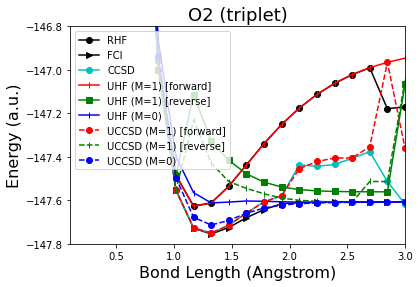

In [10]:
import matplotlib.pyplot as plt
plt.title("O2 (triplet)", fontsize=18)
plt.xlabel("Bond Length (Angstrom)", fontsize=16) 
plt.ylabel("Energy (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF, 'ko-',label = 'RHF')
plt.plot(distance, energy_FCI, 'k>-',label = 'FCI')
plt.plot(distance, energy_CCSD, 'co-',label = 'CCSD')

plt.plot(distance0, eUHF0, 'r|-',label = 'UHF (M=1) [forward]')
plt.plot(distance1, eUHF1, 'gs-',label = 'UHF (M=1) [reverse]')
plt.plot(distance2, eUHF2, 'b|-',label = 'UHF (M=0)')

plt.plot(distance0, energy_UCCSD0, 'ro--',label = 'UCCSD (M=1) [forward]')
plt.plot(distance1, energy_UCCSD1, 'g|--',label = 'UCCSD (M=1) [reverse]')
plt.plot(distance2, energy_UCCSD2, 'bo--',label = 'UCCSD (M=0)')

#plt.axhline(eROHF_atom*2,c='k',ls='--')
#plt.axhline(eFCI_atom*2,c='k',ls-)

plt.legend(loc = 2)
plt.ylim(-147.8, -146.8)
plt.xlim(0.1, 3.0)
plt.show()

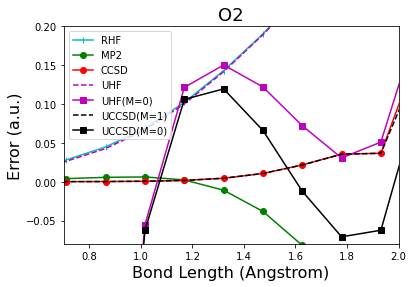

In [11]:
import matplotlib.pyplot as plt

plt.title("O2", fontsize=18)
plt.xlabel("Bond Length (Angstrom)",fontsize=16)
plt.ylabel("Error (a.u.)",fontsize=16)
plt.plot(distance, energy_RHF-energy_FCI, 'c|-', label = 'RHF')
#plt.plot(distance, energy_FCI-energy_FCI, 'bx:', label = 'FCI')
plt.plot(distance, energy_MP2-energy_FCI, 'go-', label = 'MP2')
plt.plot(distance, energy_CCSD-energy_FCI,'ro-', label = 'CCSD')

plt.plot(distance, eUHF0-energy_FCI, 'm--',label = 'UHF')
plt.plot(distance, eUHF2-energy_FCI, 'ms-',label = 'UHF(M=0)')
plt.plot(distance, energy_UCCSD0-energy_FCI, 'k--', label = 'UCCSD(M=1)')
plt.plot(distance, energy_UCCSD2-energy_FCI, 'ks-', label = 'UCCSD(M=0)')
#plt.plot(distance, energy_UHF-energy_RHF, 'r|-', label = 'UHF-RHF')

plt.legend(loc = 2)
plt.xlim(0.7,2.0)
plt.ylim(-0.08,0.2)
plt.show()